# Insurance Claims- Fraud Detection.

### Problem Statement:

**Business case:**
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 



**Prediction**
In this example, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1082]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")
sns.set_style('whitegrid')
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

import warnings 
warnings.filterwarnings('ignore')

In [824]:
Idf = pd.read_csv('Automobile_insurance_fraud.csv')

In [825]:
Idf

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [827]:
Idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Features with int datatype

In [828]:
int_type = [feature for feature in Idf.columns if Idf[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in adf is :" , len(int_type))

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39']
Number of columns with integer data type in adf is : 19


Features with object datatype

In [829]:
object_type = [feature for feature in Idf.columns if Idf[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
Number of columns with object data type in adf is : 21


### months_as_customer

<AxesSubplot:xlabel='months_as_customer', ylabel='count'>

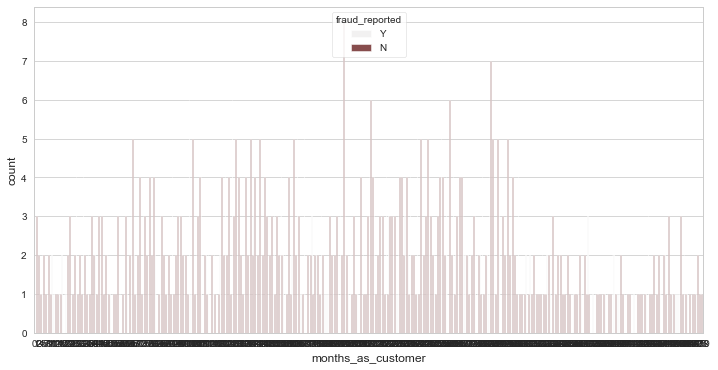

In [830]:
plt.figure(figsize = (12,6))
sns.countplot(x ='months_as_customer',hue ='fraud_reported', data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

In [831]:
Idf['months_as_customer'].value_counts()

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

In here we are not able to find much relation in between this feature and our target variable .

### Age

In [832]:
Idf['age'].value_counts()

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

In [833]:
print(Idf['age'].min())
print(Idf['age'].max())

19
64


In [834]:
Idf['age'] = pd.cut(Idf.age, bins = [10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, 
                          labels = ['11-20','21-30','31-40', '41-50', '51-60', '61-70'])

<AxesSubplot:xlabel='age', ylabel='count'>

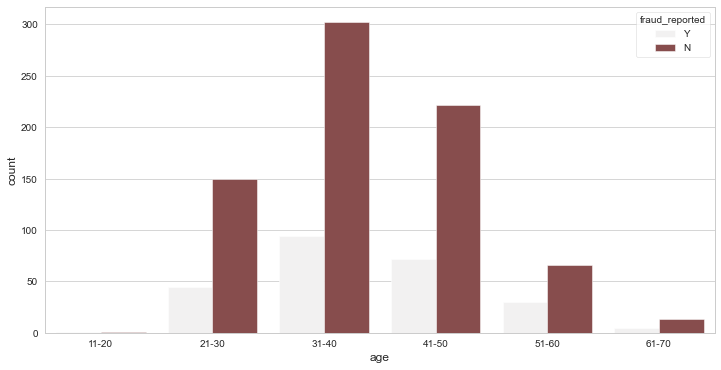

In [835]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'age' , hue = 'fraud_reported' , data = Idf , dodge = True , color = 'firebrick' , saturation = 0.4)

### policy_number

In [836]:
Idf['policy_number'].value_counts()

116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'policy_number' , hue = 'fraud_reported' , data = Idf , dodge = True , color = 'firebrick' , saturation = 0.4)

From above we can observe that there is no such relation between predictor policy_number and our target variable , its just anumber so we'll drop this in our Feature Selection.

### policy_deductable

In [838]:
Idf['policy_deductable'].nunique()

3

In [839]:
Idf['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

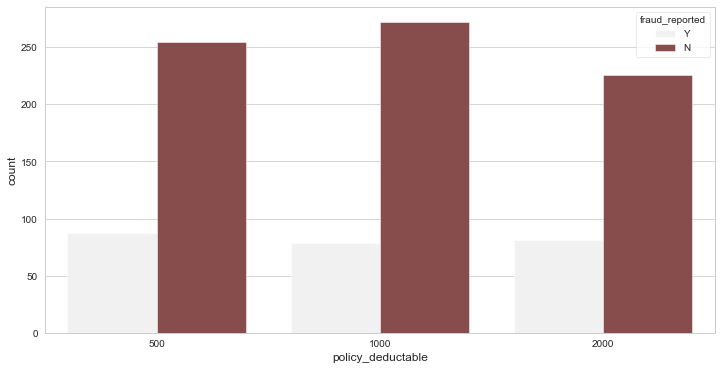

In [840]:
plt.figure(figsize = (12,6))
sns.countplot(x ='policy_deductable',hue ='fraud_reported' , data = Idf , dodge = True , color = 'firebrick' , saturation = 0.4)

From above we can observe that policy_deductable with 1000 has the highest fraud reports.

### policy_annual_premium

In [841]:
Idf['policy_annual_premium'].nunique()

991

<AxesSubplot:xlabel='policy_annual_premium', ylabel='count'>

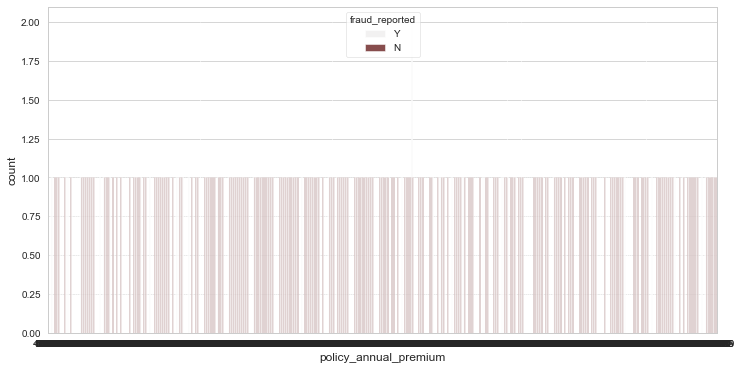

In [842]:
plt.figure(figsize = (12,6))
sns.countplot(x ='policy_annual_premium',hue = 'fraud_reported',data = Idf,dodge = True,color = 'firebrick',saturation = 0.4)

Ffrom above we can observe that there is not much variations in this dataset , further we'll drop this feature.

### umbrella_limit

In [843]:
Idf['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In here we can observe that lots of values are 0 , so we'll group all the other as 1.<br>
So here umbrella_limit will be either 0 or 1 means some other value that is not 0.

In [844]:
Idf['umbrella_limit'].replace([6000000 ,  5000000 , 4000000 ,  7000000 , 
                              3000000 , 8000000 ,9000000 , 2000000 , 10000000 ,-1000000] , 1 , inplace = True )

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

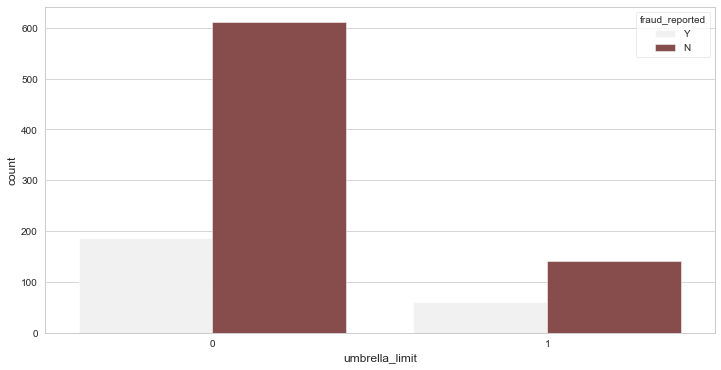

In [845]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'umbrella_limit' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

### insured_zip

In [846]:
Idf['insured_zip'].value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

In [847]:
Idf['insured_zip'].nunique()

995

<AxesSubplot:xlabel='insured_zip', ylabel='count'>

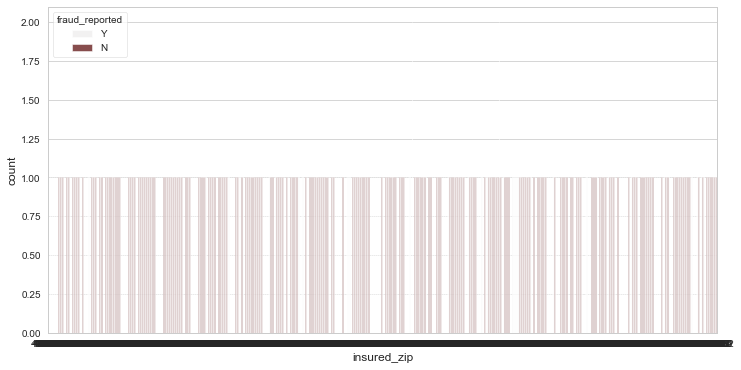

In [848]:
plt.figure(figsize = (12,6))
sns.countplot(x =  'insured_zip' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that there is not much variations in this feature , hence later on we'll drop this feautre in Feature Selection.

### Capital gain & Loss

In [849]:
Idf['capital-gains'].value_counts()

0         508
46300       5
68500       4
51500       4
48900       3
         ... 
47700       1
94800       1
90700       1
100500      1
54800       1
Name: capital-gains, Length: 338, dtype: int64

<AxesSubplot:xlabel='capital-gains', ylabel='count'>

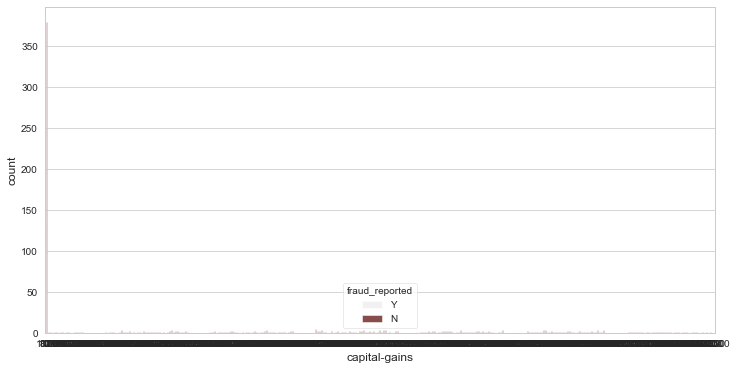

In [850]:
plt.figure(figsize = (12,6))
sns.countplot(x =  'capital-gains' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

### capital-loss

In [851]:
Idf['capital-loss'].value_counts()

 0        475
-53700      5
-50300      5
-31700      5
-49200      4
         ... 
-32600      1
-46800      1
-50600      1
-40800      1
-43900      1
Name: capital-loss, Length: 354, dtype: int64

<AxesSubplot:xlabel='capital-loss', ylabel='count'>

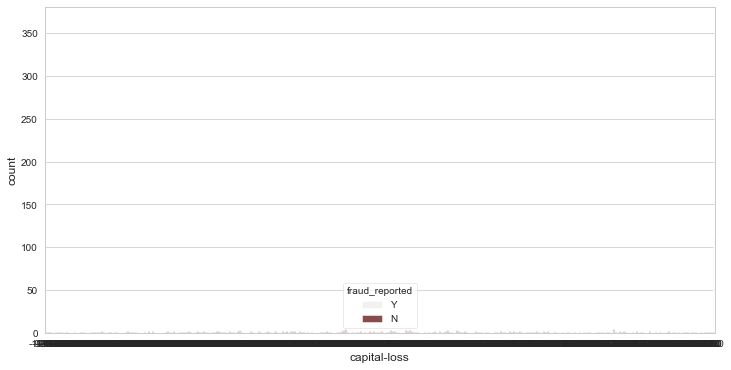

In [852]:
plt.figure(figsize = (12,6))
sns.countplot(x =  'capital-loss' , hue = 'fraud_reported' , data = Idf , dodge = True , color = 'firebrick' , saturation = 0.4)

Here simply we can create a single column as Capital difference only , but in both of them most of the values are 0 , so we can drop these features in our feature selection procedure.

### incident_hour_of_the_day

In [853]:
Idf['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In here we'll create different bins for different hours in this.

In [854]:
Idf['incident_hour_of_the_day'] = pd.cut(Idf.incident_hour_of_the_day, bins = [6 , 12 , 18 , 24 , 32], 
                                        include_lowest = False , 
                                        labels = ['0-6' , '6-12' , '12-18' , '18-24' ])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

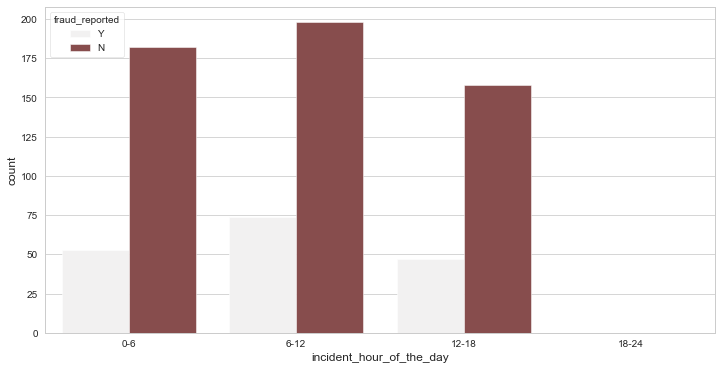

In [855]:
plt.figure(figsize = (12,6))
sns.countplot(x ='incident_hour_of_the_day',hue = 'fraud_reported',data = Idf,dodge = True,color = 'firebrick',saturation = 0.4)

In [856]:
Idf['incident_hour_of_the_day'].value_counts()

6-12     272
0-6      235
12-18    205
18-24      0
Name: incident_hour_of_the_day, dtype: int64

### number_of_vehicles_involved

In [857]:
Idf['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

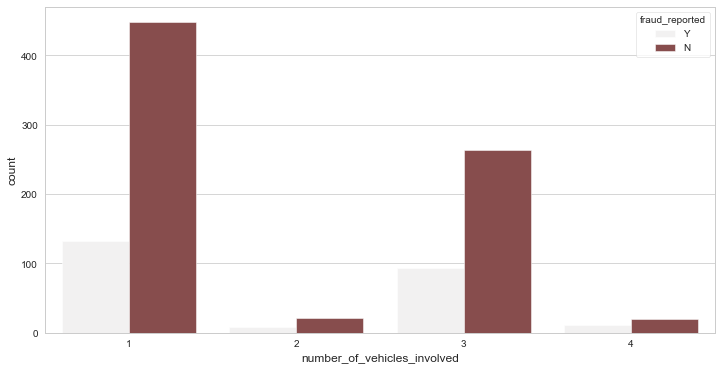

In [858]:
plt.figure(figsize = (12,6))
sns.countplot(x ='number_of_vehicles_involved',hue ='fraud_reported',data=Idf,dodge=True,color = 'firebrick' , saturation = 0.4)

From above we can observe that most number of vehicles involved are either 1 or 3.

### bodily_injuries

In [859]:
Idf['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

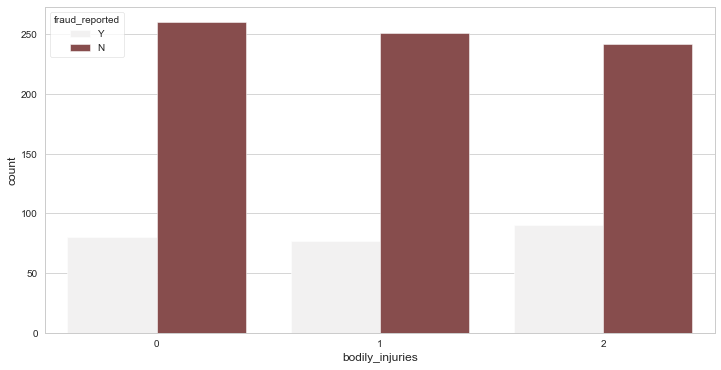

In [860]:
plt.figure(figsize = (12,6))
sns.countplot(x ='bodily_injuries', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that bodily reported as 2 has the highest fraud reports among these 3.

### witnesses

In [861]:
Idf['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<AxesSubplot:xlabel='witnesses', ylabel='count'>

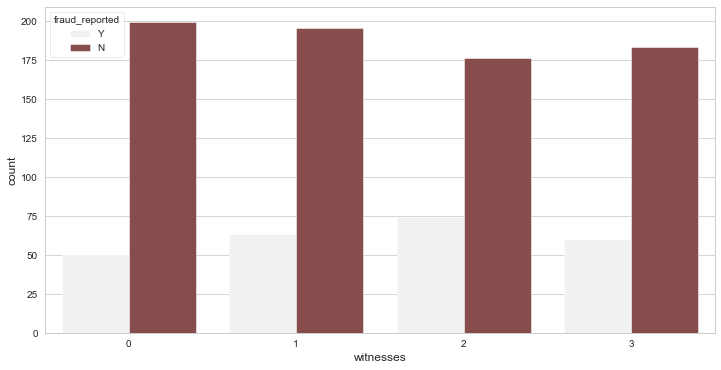

In [862]:
plt.figure(figsize = (12,6))
sns.countplot(x ='witnesses', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that the cases which has 2 witnessess has the highest fraud reported.

### total_claim_amount

<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

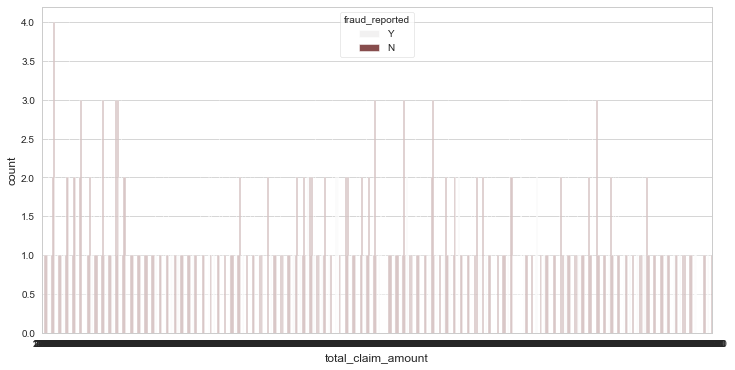

In [863]:
plt.figure(figsize = (12,6))
sns.countplot(x ='total_claim_amount', hue ='fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

In [864]:
Idf['total_claim_amount'].value_counts()

59400    5
75400    4
60600    4
2640     4
58500    4
        ..
57970    1
41580    1
45180    1
3690     1
71680    1
Name: total_claim_amount, Length: 763, dtype: int64

From above we are not able to find much about this feature.

### injury_claim

<AxesSubplot:xlabel='injury_claim', ylabel='count'>

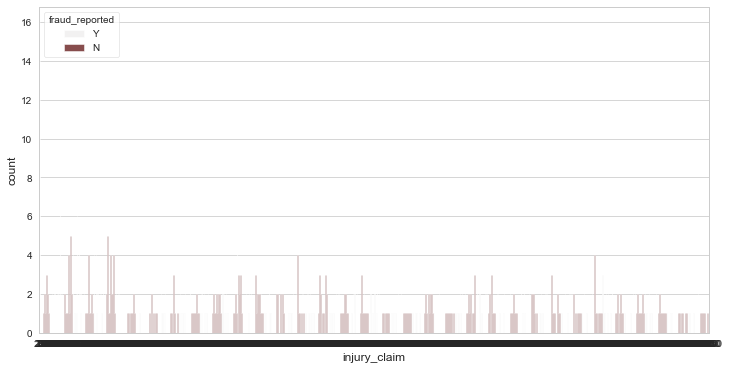

In [865]:
plt.figure(figsize = (12,6))
sns.countplot(x ='injury_claim', hue ='fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

In [866]:
Idf['injury_claim'].value_counts()

0        25
480       7
640       7
580       5
6340      5
         ..
16820     1
5960      1
10840     1
8000      1
5530      1
Name: injury_claim, Length: 638, dtype: int64

In here we are not able to find much relation in between this feature and our target variable .

### property_claim

<AxesSubplot:xlabel='property_claim', ylabel='count'>

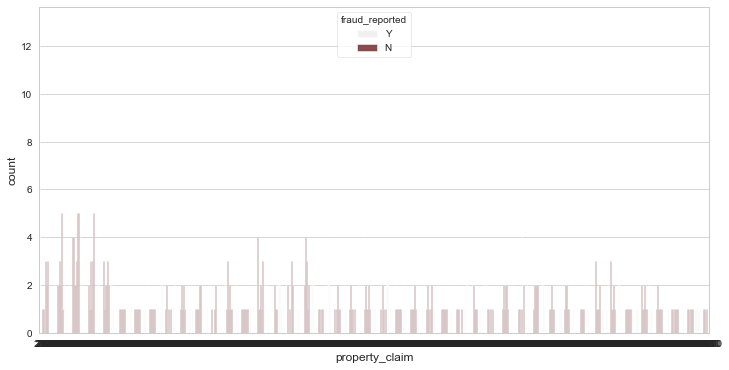

In [867]:
plt.figure(figsize = (12,6))
sns.countplot(x ='property_claim', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

In [868]:
Idf['property_claim'].value_counts()

0        19
860       6
660       5
480       5
10000     5
         ..
17880     1
1500      1
14080     1
7850      1
21630     1
Name: property_claim, Length: 626, dtype: int64

In here we are not able to find much relation in between this feature and our target variable .

### vehicle_claim

<AxesSubplot:xlabel='vehicle_claim', ylabel='count'>

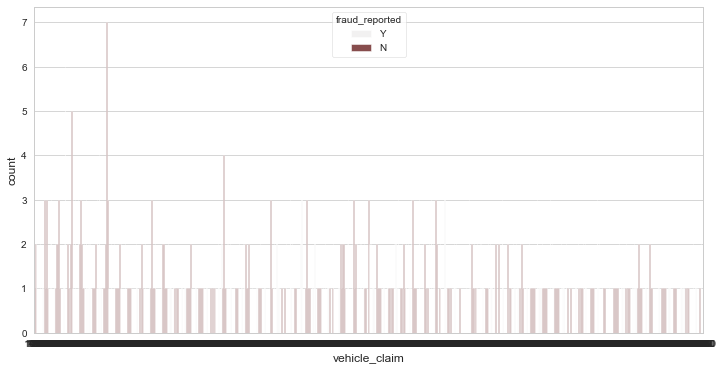

In [869]:
plt.figure(figsize = (12,6))
sns.countplot(x ='vehicle_claim', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

In [870]:
Idf['vehicle_claim'].value_counts()

5040     7
3360     6
3600     5
44800    5
33600    5
        ..
46680    1
3640     1
34320    1
40530    1
51200    1
Name: vehicle_claim, Length: 726, dtype: int64

In here we are not able to find much relation in between this feature and our target variable .

### auto_year

In [871]:
Idf['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [872]:
Idf['auto_year'] = pd.cut(Idf.auto_year, bins = [1995 , 2000 , 2005 , 2010 , 2015 ], 
                          include_lowest = True, 
                          labels = ['1995-2000' , '2000-2005' , '2005-2010' , '2010-2015'])

<AxesSubplot:xlabel='auto_year', ylabel='count'>

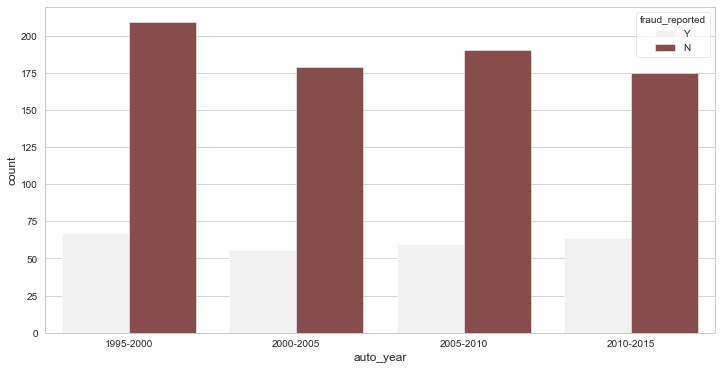

In [873]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'auto_year', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

In [874]:
Idf['auto_year'].value_counts()

1995-2000    276
2005-2010    250
2010-2015    239
2000-2005    235
Name: auto_year, dtype: int64

#### Policy State

In [875]:
Idf['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

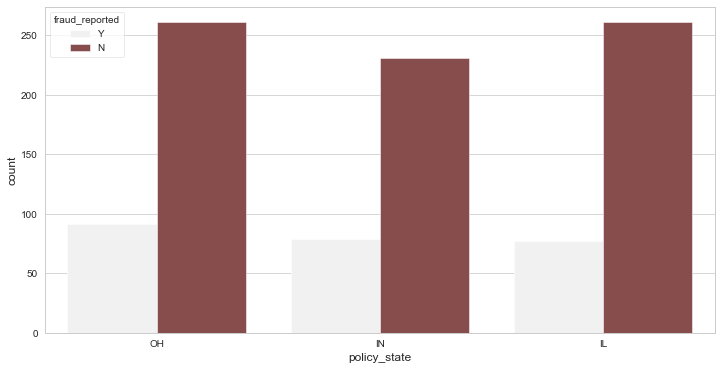

In [876]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'policy_state' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that OH has max fraud reported and IN is a state with less case reported . 

### insured_sex

In [877]:
Idf['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [878]:
Idf[(Idf['insured_sex']=='FEMALE')& (Idf['fraud_reported']=='Y')].count(axis= 0)

months_as_customer             126
age                            126
policy_number                  126
policy_bind_date               126
policy_state                   126
policy_csl                     126
policy_deductable              126
policy_annual_premium          126
umbrella_limit                 126
insured_zip                    126
insured_sex                    126
insured_education_level        126
insured_occupation             126
insured_hobbies                126
insured_relationship           126
capital-gains                  126
capital-loss                   126
incident_date                  126
incident_type                  126
collision_type                 126
incident_severity              126
authorities_contacted          126
incident_state                 126
incident_city                  126
incident_location              126
incident_hour_of_the_day        86
number_of_vehicles_involved    126
property_damage                126
bodily_injuries     

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

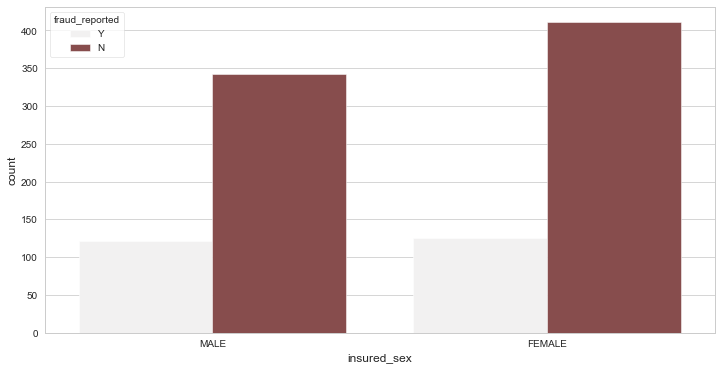

In [879]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'insured_sex' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

### insured_education_level

In [880]:
Idf['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

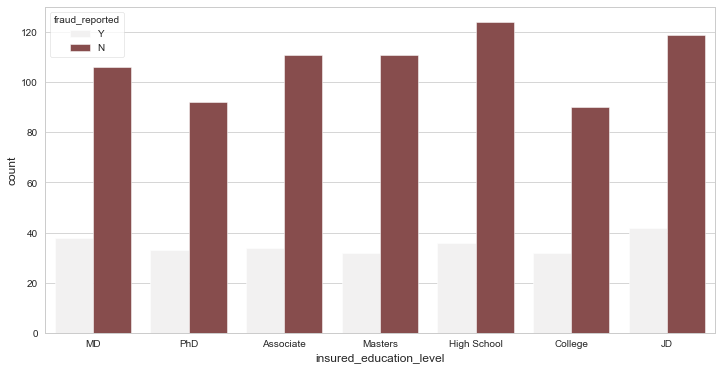

In [881]:
plt.figure(figsize = (12,6))
sns.countplot(x='insured_education_level',hue ='fraud_reported',data = Idf,dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that people who has an education level of JD has the highest fraud_reported . 

### insured_occupation

In [882]:
Idf['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

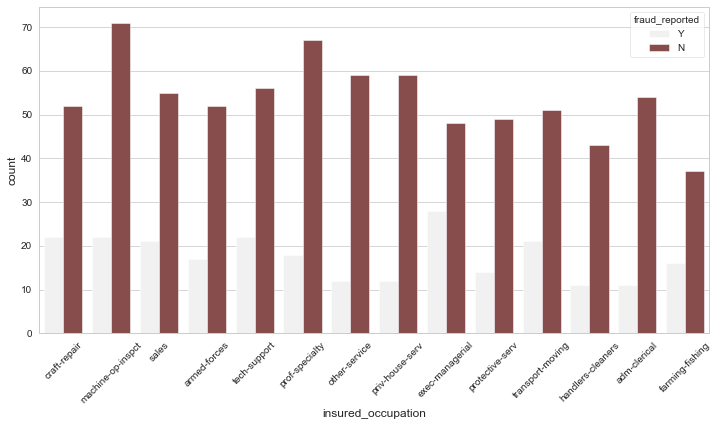

In [883]:
plt.figure(figsize = (12,6) )
plt.xticks(rotation = 45)
sns.countplot(x = 'insured_occupation',hue = 'fraud_reported',data = Idf,dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that people who has an occupation of exec_managerial has the highest fraud_reported.

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

### insured_hobbies

In [886]:
Idf['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

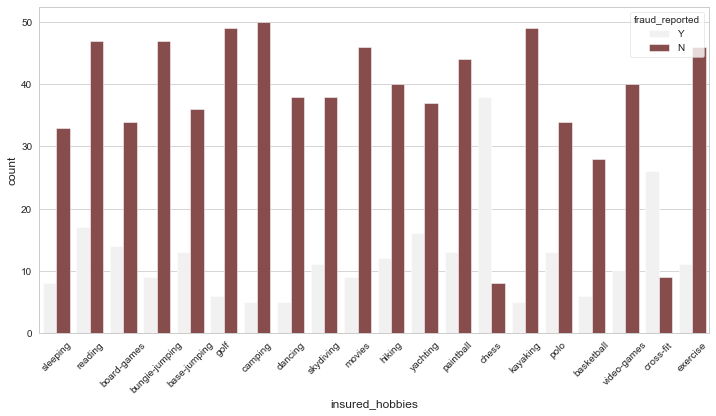

In [887]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 45)
sns.countplot(x = 'insured_hobbies',hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can sincerely observe that people whose hobbies are chess and cross-fit has the highest and second highest fraud_reported .  

In [888]:
'insured_relationship'

'insured_relationship'

### insured_relationship

In [889]:
Idf['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

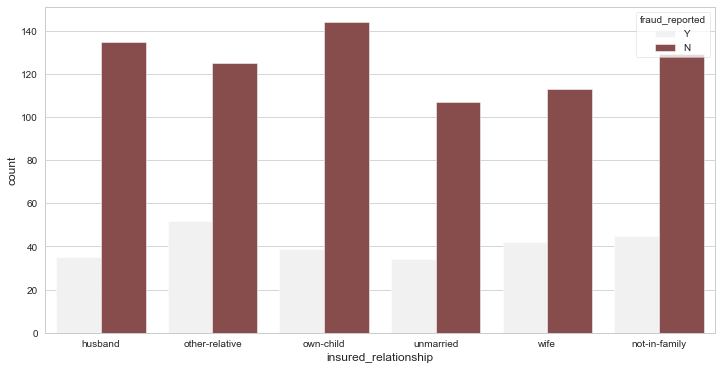

In [890]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'insured_relationship',hue = 'fraud_reported',data = Idf,dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that people who has other-relatives as in their insured-relationship has the highest fraud_reported among all the other insured-relationships.

### incident_date

In [891]:
Idf['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
04-02-2015    24
10-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
31-01-2015    20
06-02-2015    20
12-02-2015    20
22-02-2015    20
21-02-2015    19
23-02-2015    19
21-01-2015    19
12-01-2015    19
01-01-2015    19
14-01-2015    19
25-02-2015    18
18-01-2015    18
28-02-2015    18
14-02-2015    18
03-01-2015    18
20-01-2015    18
01-02-2015    18
06-01-2015    17
24-02-2015    17
08-02-2015    17
09-01-2015    17
26-02-2015    17
13-02-2015    16
05-02-2015    16
16-02-2015    16
16-01-2015    16
15-02-2015    16
18-02-2015    15
15-01-2015    15
17-01-2015    15
28-01-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
09-02-2015    13
03-02-2015    13
23-01-2015    13
27-01-2015    13
01-03-2015    12
04-01-2015    12
02-01-2015    11
26-01-2015    11
29-01-2015    11
19-02-2015    10
10-02-2015    10
11-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [892]:
incident_date_highest_yes = Idf['fraud_reported']=='Y'

<AxesSubplot:xlabel='incident_date', ylabel='count'>

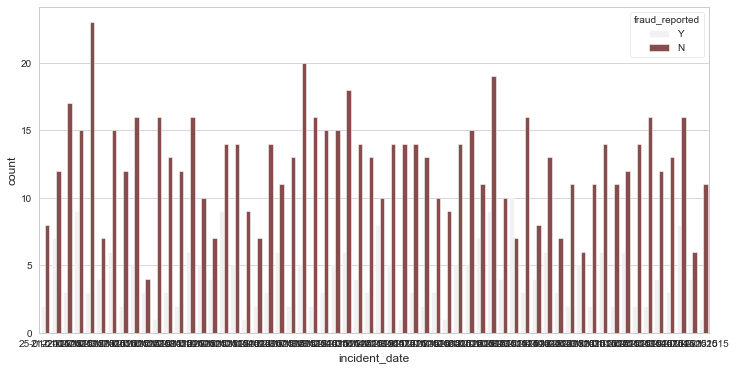

In [893]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_date' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

In here we are not able to find any pattern or relationships , but we can observe that 02-02-15 is the date when the highest 

### incident_type

In [894]:
Idf['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot:xlabel='incident_type', ylabel='count'>

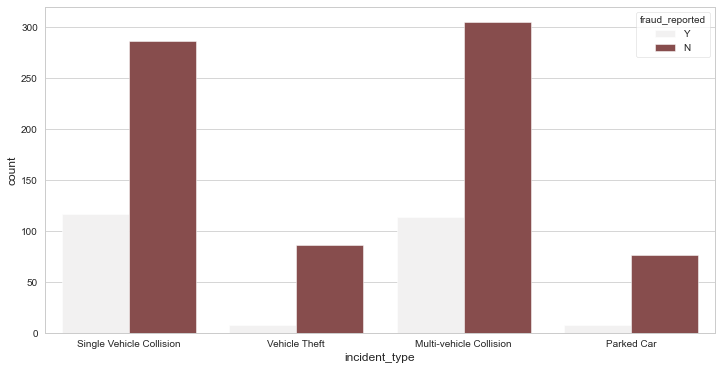

In [895]:
plt.figure(figsize = (12,6))
sns.countplot(x ='incident_type', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that Collisions are the incident types where the fraud_reported are maximum . 

### collision_type

In [896]:
Idf['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type', ylabel='count'>

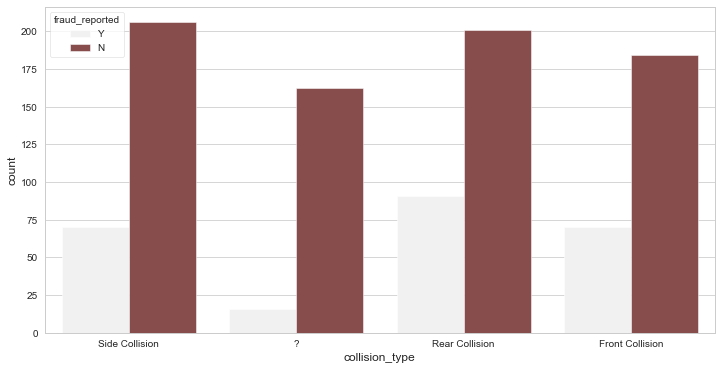

In [897]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'collision_type', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that there are vaalues whose collision types we don't know , We will deal with it furtherly . and also we can observe that Rear_collision are the collision_type in which there is maximum fraud_reported.

### incident_severity

In [898]:
Idf['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

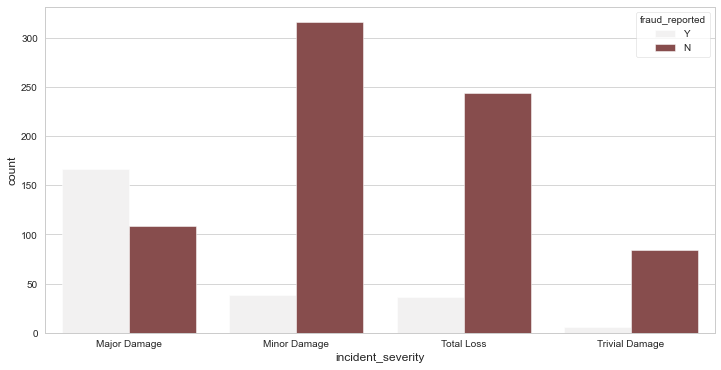

In [899]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_severity',hue = 'fraud_reported',data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that Major Damage are the incident_severity which has maximum fraud_reported.

### authorities_contacted

In [900]:
Idf['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

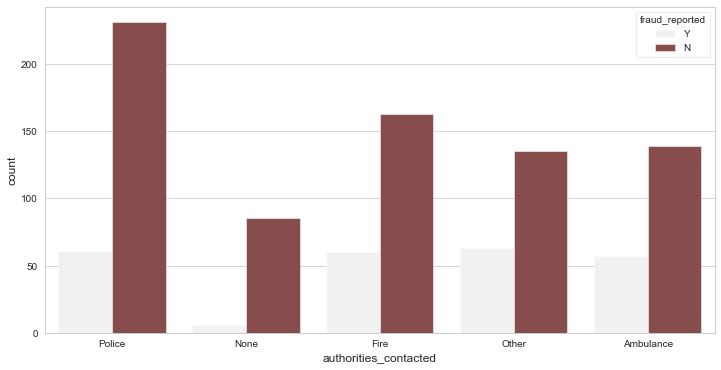

In [901]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'authorities_contacted',hue = 'fraud_reported',data = Idf,dodge = True,color = 'firebrick' , saturation = 0.4)

From above we can observe that the max case reported is to the police . 

### incident_state

In [902]:
Idf['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

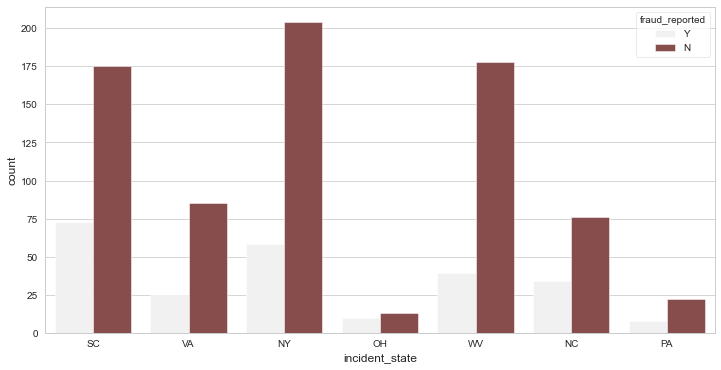

In [903]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_state', hue = 'fraud_reported',data = Idf,dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that south carolina is a state where fraud_reported is the maximum . 

### incident_city

In [904]:
Idf['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

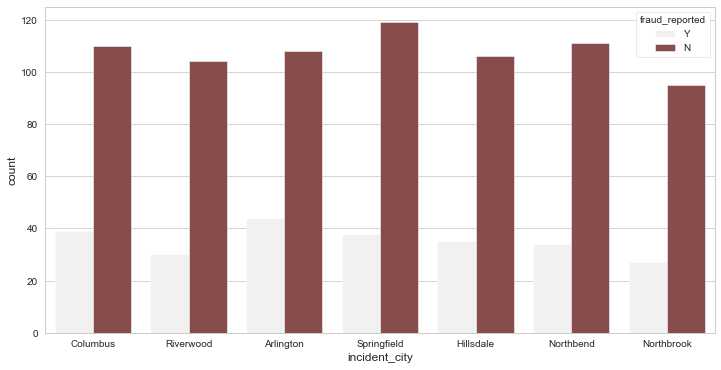

In [905]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_city', hue = 'fraud_reported',data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that Arlington is a city where the fraud_reported is maximum.

### 'incident_location'

In [906]:
Idf['incident_location'].value_counts()

2533 Elm St           1
2337 Lincoln Hwy      1
3323 1st Lane         1
3220 Rock Drive       1
3555 Francis Ridge    1
                     ..
1578 5th Lane         1
7511 1st Ave          1
4826 5th St           1
1133 Apache St        1
2804 Best St          1
Name: incident_location, Length: 1000, dtype: int64

<AxesSubplot:xlabel='incident_location', ylabel='count'>

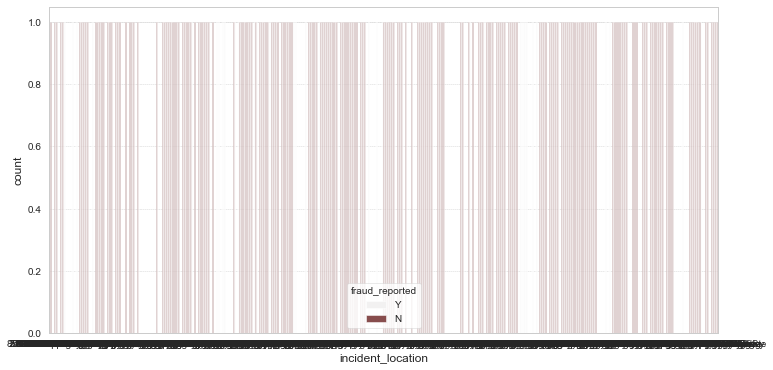

In [907]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_location', hue = 'fraud_reported',data = Idf,dodge = True ,color = 'firebrick' , saturation = 0.4)

Here we are not able to find any meaningful insights from this feature.

### property_damage

In [908]:
Idf['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage', ylabel='count'>

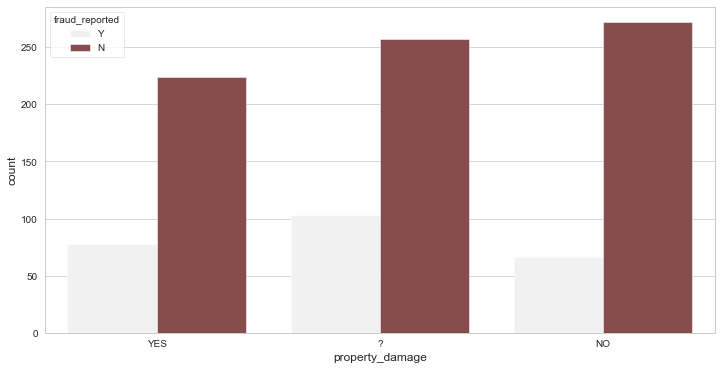

In [909]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'property_damage', hue = 'fraud_reported',data = Idf , dodge = True ,color = 'firebrick' , saturation = 0.4)

From above we can observe that ther are values which are not known , so we will deal with them later on.

### police_report_available

In [910]:
Idf['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

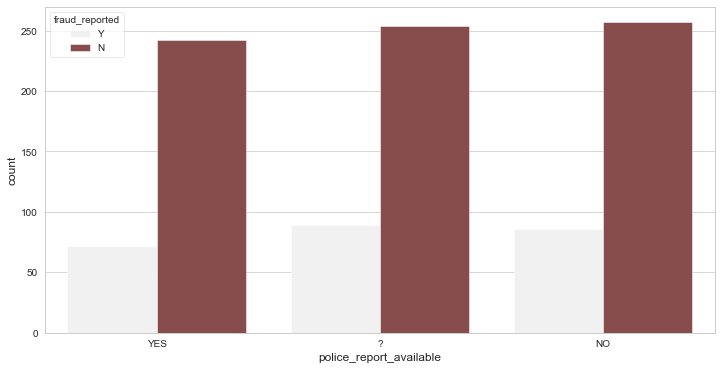

In [911]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'police_report_available',hue = 'fraud_reported',data = Idf,dodge = True,color ='firebrick',saturation = 0.4)

From above we can observe that there are many missing values , hence later we will deal with them.

### auto_make

In [912]:
Idf['auto_make'].value_counts()

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='auto_make', ylabel='count'>

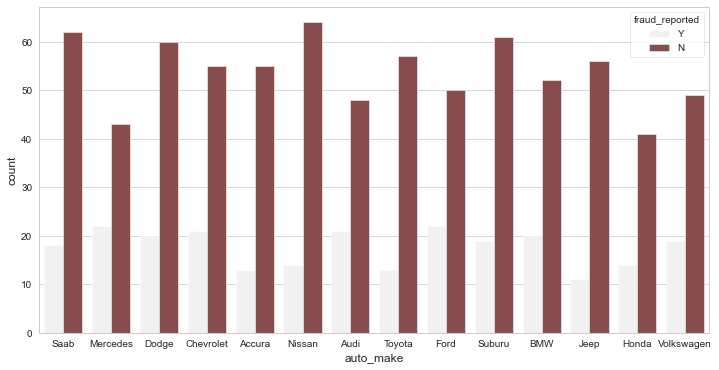

In [913]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'auto_make', hue = 'fraud_reported' , data = Idf , dodge = True,color ='firebrick',saturation = 0.4)

We are not able to find any meaningful insights from this feature.

### auto_model

<AxesSubplot:xlabel='auto_model', ylabel='count'>

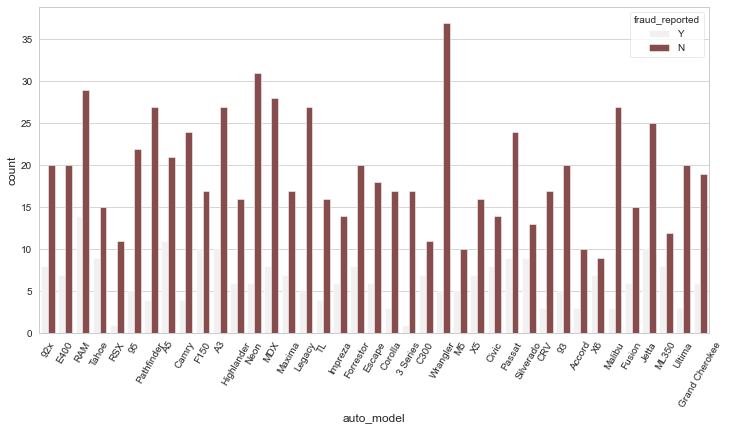

In [914]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 60)
sns.countplot(x = 'auto_model', hue = 'fraud_reported' , data = Idf , dodge = True ,color ='firebrick',saturation = 0.4)

From above we can observe RAM is the auto_model which has the highest fraud_reported.

## Data Preprocessing

In [915]:
Idf.head(8)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,41-50,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2000-2005,Y,NaN
1,228,41-50,342868,27-06-2006,IN,250/500,2000,1197.22,1,468176,...,?,5070,780,780,3510,Mercedes,E400,2005-2010,Y,NaN
2,134,21-30,687698,06-09-2000,OH,100/300,2000,1413.14,1,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2005-2010,N,NaN
3,256,41-50,227811,25-05-1990,IL,250/500,2000,1415.74,1,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2010-2015,Y,NaN
4,228,41-50,367455,06-06-2014,IL,500/1000,1000,1583.91,1,610706,...,NO,6500,1300,650,4550,Accura,RSX,2005-2010,N,NaN
5,256,31-40,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2000-2005,Y,NaN
6,137,31-40,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2010-2015,N,NaN
7,165,31-40,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2010-2015,N,NaN


#### age

In [916]:
Idf['age'].value_counts()

31-40    396
41-50    293
21-30    195
51-60     96
61-70     18
11-20      2
Name: age, dtype: int64

In [917]:
le = LabelEncoder()
Idf['age'] = le.fit_transform(Idf['age'])

In [918]:
Idf['age'].value_counts()

2    396
3    293
1    195
4     96
5     18
0      2
Name: age, dtype: int64

#### policy_number

We can drop this column as its just a random number given.

#### Policy Bind Date

In [923]:
Idf['policy_bind_date'] = pd.to_datetime(Idf['policy_bind_date'])

In [924]:
print (Idf['policy_bind_date'].dtype)

datetime64[ns]


In [925]:
Idf['Bind_year'] = Idf['policy_bind_date'].dt.year

In [926]:
Idf['Bind_year'].value_counts()

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
1994    41
2006    41
2001    41
2007    40
2005    40
1999    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
1993    33
2008    33
2011    32
2000    31
1998    30
2015     3
Name: Bind_year, dtype: int64

In [927]:
print(Idf['Bind_year'].min())
print(Idf['Bind_year'].max())

1990
2015


In [928]:
Idf['Bind_year'] = pd.cut(Idf.Bind_year, bins = [1990 , 1995 , 2000 , 2005 , 2010 , 2015 ], 
                          include_lowest = True, 
                          labels = ['1990-1995' , '1995-2000' , '2000-2005' , '2005-2010' , '2010-2015'])

In [929]:
Idf['Bind_year'].value_counts()

1990-1995    264
2000-2005    204
2005-2010    195
1995-2000    188
2010-2015    149
Name: Bind_year, dtype: int64

In [930]:
le = LabelEncoder()
Idf['Bind_year'] = le.fit_transform(Idf['Bind_year'])

In [933]:
Idf['Bind_year'].value_counts()

0    264
2    204
3    195
1    188
4    149
Name: Bind_year, dtype: int64

#### policy_state

In [934]:
le = LabelEncoder()
Idf['policy_state'] = le.fit_transform(Idf['policy_state'])

In [935]:
Idf['policy_state'].value_counts()

2    352
0    338
1    310
Name: policy_state, dtype: int64

#### policy_csl

In [936]:
Idf['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [937]:
le = LabelEncoder()
Idf['policy_csl'] = le.fit_transform(Idf['policy_csl'])

In [938]:
Idf['policy_csl'].value_counts()

1    351
0    349
2    300
Name: policy_csl, dtype: int64

#### insured_sex

In [939]:
Idf['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [940]:
le = LabelEncoder()
Idf['insured_sex'] = le.fit_transform(Idf['insured_sex'])

In [941]:
Idf['insured_sex'].value_counts()

0    537
1    463
Name: insured_sex, dtype: int64

#### insured_education_level

In [942]:
Idf['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [943]:
le = LabelEncoder()
Idf['insured_education_level'] = le.fit_transform(Idf['insured_education_level'])

In [944]:
Idf['insured_education_level'].value_counts()

3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64

#### insured_occupation

In [945]:
Idf['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [946]:
le = LabelEncoder()
Idf['insured_occupation'] = le.fit_transform(Idf['insured_occupation'])

In [947]:
Idf['insured_occupation'].value_counts()

6     93
9     85
12    78
11    76
3     76
2     74
13    72
8     71
7     71
1     69
0     65
10    63
5     54
4     53
Name: insured_occupation, dtype: int64

#### insured_hobbies

In [948]:
Idf['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [949]:
le = LabelEncoder()
Idf['insured_hobbies'] = le.fit_transform(Idf['insured_hobbies'])

In [950]:
Idf['insured_hobbies'].value_counts()

15    64
8     57
13    57
3     56
9     55
4     55
12    55
11    54
19    53
10    52
18    50
16    49
0     49
2     48
14    47
5     46
7     43
17    41
6     35
1     34
Name: insured_hobbies, dtype: int64

#### insured_relationship

In [951]:
Idf['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [952]:
le = LabelEncoder()
Idf['insured_relationship'] = le.fit_transform(Idf['insured_relationship'])

In [953]:
Idf['insured_relationship'].value_counts()

3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64

#### Capital Gain & Loss

Instead of hhaving two features we will have a single feature as Capital Difference.

In [954]:
Idf['capital_diff'] = Idf['capital-gains'] - Idf['capital-loss']

In [955]:
Idf['capital_diff'].value_counts()

0         251
51500       5
51000       5
45300       5
53800       4
         ... 
127600      1
93000       1
81400       1
84600       1
58200       1
Name: capital_diff, Length: 522, dtype: int64

#### incident_date 

In [956]:
Idf['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
04-02-2015    24
10-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
31-01-2015    20
06-02-2015    20
12-02-2015    20
22-02-2015    20
21-02-2015    19
23-02-2015    19
21-01-2015    19
12-01-2015    19
01-01-2015    19
14-01-2015    19
25-02-2015    18
18-01-2015    18
28-02-2015    18
14-02-2015    18
03-01-2015    18
20-01-2015    18
01-02-2015    18
06-01-2015    17
24-02-2015    17
08-02-2015    17
09-01-2015    17
26-02-2015    17
13-02-2015    16
05-02-2015    16
16-02-2015    16
16-01-2015    16
15-02-2015    16
18-02-2015    15
15-01-2015    15
17-01-2015    15
28-01-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
09-02-2015    13
03-02-2015    13
23-01-2015    13
27-01-2015    13
01-03-2015    12
04-01-2015    12
02-01-2015    11
26-01-2015    11
29-01-2015    11
19-02-2015    10
10-02-2015    10
11-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [959]:
Idf['incident_date'] = pd.to_datetime(Idf['incident_date'])

In [960]:
Idf['incident_year'] = Idf['incident_date'].dt.year

#### incident_type

In [961]:
Idf['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [962]:
le = LabelEncoder()
Idf['incident_type'] = le.fit_transform(Idf['incident_type'])

In [963]:
Idf['incident_type'].value_counts()

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64

#### collision_type

In [964]:
Idf['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

Here we can observe that collision type of 178 claims are not known so we'll just fill them with NA.

In [965]:
Idf['collision_type'].replace('?' , 'NA' , inplace = True)

In [966]:
Idf['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64

In [967]:
le = LabelEncoder()
Idf['collision_type'] = le.fit_transform(Idf['collision_type'])

In [968]:
Idf['collision_type'].value_counts()

2    292
3    276
0    254
1    178
Name: collision_type, dtype: int64

#### incident_severity

In [969]:
Idf['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [970]:
le = LabelEncoder()
Idf['incident_severity'] = le.fit_transform(Idf['incident_severity'])

In [971]:
Idf['incident_severity'].value_counts()

1    354
2    280
0    276
3     90
Name: incident_severity, dtype: int64

#### authorities_contacted

In [972]:
Idf['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [973]:
le = LabelEncoder()
Idf['authorities_contacted'] = le.fit_transform(Idf['authorities_contacted'])

In [974]:
Idf['authorities_contacted'].value_counts()

4    292
1    223
3    198
0    196
2     91
Name: authorities_contacted, dtype: int64

#### incident_state

In [975]:
Idf['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [976]:
le = LabelEncoder()
Idf['incident_state'] = le.fit_transform(Idf['incident_state'])

In [977]:
Idf['incident_state'].value_counts()

1    262
4    248
6    217
5    110
0    110
3     30
2     23
Name: incident_state, dtype: int64

#### incident_city

In [978]:
Idf['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [979]:
Idf['incident_city'] = le.fit_transform(Idf['incident_city'])

In [980]:
Idf['incident_city'].value_counts()

6    157
0    152
1    149
3    145
2    141
5    134
4    122
Name: incident_city, dtype: int64

#### incident_location 

In [981]:
Idf['incident_location'].value_counts()

2533 Elm St           1
2337 Lincoln Hwy      1
3323 1st Lane         1
3220 Rock Drive       1
3555 Francis Ridge    1
                     ..
1578 5th Lane         1
7511 1st Ave          1
4826 5th St           1
1133 Apache St        1
2804 Best St          1
Name: incident_location, Length: 1000, dtype: int64

We'll drop this feature in feature selection procedure as its irrelevant to carry it for our future predictions.

#### incident_hour_of_the_day

In [982]:
Idf['incident_hour_of_the_day'].value_counts()

6-12     272
0-6      235
12-18    205
18-24      0
Name: incident_hour_of_the_day, dtype: int64

We'll drop this feature as its not related anyhow with fraud reports.

In [983]:
# Idf.drop('incident_hour_of_the_day' , axis = 1)

#### number_of_vehicles_involved

In [984]:
Idf['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

#### property_damage

In [985]:
Idf['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

Here there are values in which the condition of property damage is not known , so we'll just convert them to NO.

In [986]:
Idf['property_damage'].replace('?' , 'NO' , inplace = True)

In [987]:
le = LabelEncoder()
Idf['property_damage'] = le.fit_transform(Idf['property_damage'])

In [988]:
Idf['property_damage'].value_counts()

0    698
1    302
Name: property_damage, dtype: int64

#### bodily_injuries 

In [989]:
Idf['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

#### witnesses

In [990]:
Idf['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

#### police_report_available

In [991]:
Idf['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

Here we'll replace not known values with NO.

In [992]:
Idf['police_report_available'].replace('?' , 'NO' , inplace = True)

In [993]:
le = LabelEncoder()
Idf['police_report_available'] = le.fit_transform(Idf['police_report_available'])

In [994]:
Idf['police_report_available'].value_counts()

0    686
1    314
Name: police_report_available, dtype: int64

#### total_claim_amount

In [995]:
Idf['total_claim_amount'].value_counts()

59400    5
75400    4
60600    4
2640     4
58500    4
        ..
57970    1
41580    1
45180    1
3690     1
71680    1
Name: total_claim_amount, Length: 763, dtype: int64

#### injury_claim

In [996]:
Idf['injury_claim'].value_counts()

0        25
480       7
640       7
580       5
6340      5
         ..
16820     1
5960      1
10840     1
8000      1
5530      1
Name: injury_claim, Length: 638, dtype: int64

#### property_claim

In [997]:
Idf['property_claim'].value_counts()

0        19
860       6
660       5
480       5
10000     5
         ..
17880     1
1500      1
14080     1
7850      1
21630     1
Name: property_claim, Length: 626, dtype: int64

#### vehicle_claim

In [998]:
Idf['vehicle_claim'].value_counts()

5040     7
3360     6
3600     5
44800    5
33600    5
        ..
46680    1
3640     1
34320    1
40530    1
51200    1
Name: vehicle_claim, Length: 726, dtype: int64

We'll just create another feature as IDV(Insurance declared value) = Total claim - Vehicle claim

In [999]:
Idf['claim'] = Idf['injury_claim']*Idf['total_claim_amount']/(Idf['property_claim']+Idf['vehicle_claim'])

#### auto_make

In [1000]:
Idf['auto_make'].value_counts()

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [1001]:
le = LabelEncoder()
Idf['auto_make'] = le.fit_transform(Idf['auto_make'])

#### auto_year

In [1002]:
Idf['auto_year'].value_counts()

1995-2000    276
2005-2010    250
2010-2015    239
2000-2005    235
Name: auto_year, dtype: int64

In [1003]:
le = LabelEncoder()
Idf['auto_year'] = le.fit_transform(Idf['auto_year'])

In [1004]:
Idf['auto_year'].value_counts()

0    276
2    250
3    239
1    235
Name: auto_year, dtype: int64

#### auto_model

In [1005]:
Idf['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
F150              27
E400              27
95                27
Grand Cherokee    25
93                25
Maxima            24
Tahoe             24
Escape            24
X5                23
Ultima            23
Civic             22
Highlander        22
Silverado         22
Fusion            21
Corolla           20
ML350             20
Impreza           20
CRV               20
TL                20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

We'll drop this feature in our feature selection procedure , as auto_make is sufficient.

#### fraud_reported

In [1006]:
Idf['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [1007]:
le = LabelEncoder()
Idf['fraud_reported'] = le.fit_transform(Idf['fraud_reported'])

In [1008]:
Idf['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Checking for percentage of null values in each column.

In [1009]:
for col in Idf:
    percentage = np.round((Idf[col].isnull().sum()/1000)*100,2)
    print(col,':' , percentage,'%')

months_as_customer : 0.0 %
age : 0.0 %
policy_number : 0.0 %
policy_bind_date : 0.0 %
policy_state : 0.0 %
policy_csl : 0.0 %
policy_deductable : 0.0 %
policy_annual_premium : 0.0 %
umbrella_limit : 0.0 %
insured_zip : 0.0 %
insured_sex : 0.0 %
insured_education_level : 0.0 %
insured_occupation : 0.0 %
insured_hobbies : 0.0 %
insured_relationship : 0.0 %
capital-gains : 0.0 %
capital-loss : 0.0 %
incident_date : 0.0 %
incident_type : 0.0 %
collision_type : 0.0 %
incident_severity : 0.0 %
authorities_contacted : 0.0 %
incident_state : 0.0 %
incident_city : 0.0 %
incident_location : 0.0 %
incident_hour_of_the_day : 28.8 %
number_of_vehicles_involved : 0.0 %
property_damage : 0.0 %
bodily_injuries : 0.0 %
witnesses : 0.0 %
police_report_available : 0.0 %
total_claim_amount : 0.0 %
injury_claim : 0.0 %
property_claim : 0.0 %
vehicle_claim : 0.0 %
auto_make : 0.0 %
auto_model : 0.0 %
auto_year : 0.0 %
fraud_reported : 0.0 %
_c39 : 100.0 %
Bind_year : 0.0 %
capital_diff : 0.0 %
incident_year

### Feature Selection

In [1010]:
Idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int32         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   int32         
 5   policy_csl                   1000 non-null   int32         
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   int32         
 11  insured_education_level      1000 non-null  

In [1011]:
corr_df = Idf.corr()

In [1012]:
target_relation = corr_df.iloc[: , 31 :32]

In [1013]:
target_relation

,auto_make
months_as_customer,0.047655
age,0.032038
policy_number,0.023860
policy_state,0.017124
policy_csl,-0.004701
policy_deductable,-0.035379
policy_annual_premium,0.000045
umbrella_limit,0.006613
insured_zip,-0.020892
insured_sex,0.026457


Here we will drop some features as some of them are irrelevant to take on .

In [1014]:
Idf.drop(columns =  ['months_as_customer' , 'policy_bind_date', 'policy_number' ,'policy_deductable' , 
                     'policy_annual_premium','capital-gains' , 'capital-loss' ,'incident_date', 'auto_model' , 
                     'incident_date','incident_city' ,'incident_location', 'property_claim','total_claim_amount',
                     'injury_claim' , 'vehicle_claim' , '_c39' , 'incident_year' , 'incident_hour_of_the_day' ,
                     'incident_date'] , 
                      inplace = True )   

In [1015]:
Idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int32  
 1   policy_state                 1000 non-null   int32  
 2   policy_csl                   1000 non-null   int32  
 3   umbrella_limit               1000 non-null   int64  
 4   insured_zip                  1000 non-null   int64  
 5   insured_sex                  1000 non-null   int32  
 6   insured_education_level      1000 non-null   int32  
 7   insured_occupation           1000 non-null   int32  
 8   insured_hobbies              1000 non-null   int32  
 9   insured_relationship         1000 non-null   int32  
 10  incident_type                1000 non-null   int32  
 11  collision_type               1000 non-null   int32  
 12  incident_severity            1000 non-null   int32  
 13  authorities_contact

<AxesSubplot:>

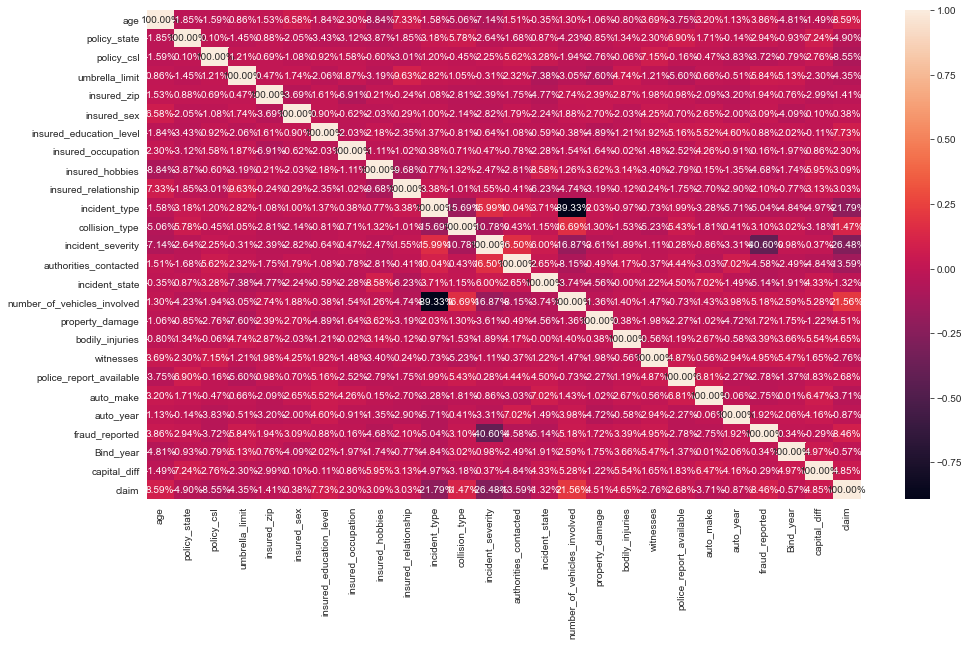

In [1018]:
plt.figure(figsize = (16,9))
sns.heatmap(Idf.corr() , annot = True ,fmt = '.2%')

### Visualising & Removing Outliers 

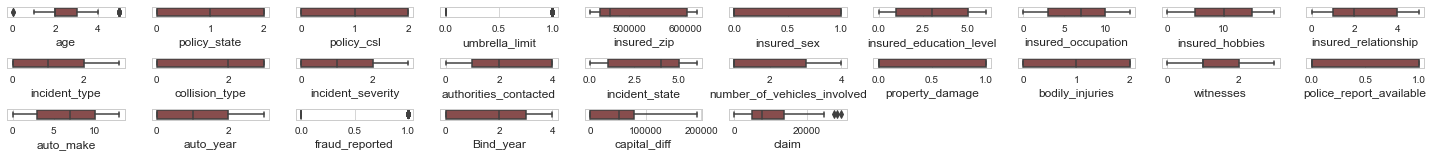

In [1024]:
collist=Idf.columns.values
ncol=10
nrows=20
plt.figure(figsize=(20,14))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Idf[collist[i]],color ='firebrick',saturation = 0.4)
    plt.tight_layout()

From above we can observe that there are outliers present so we'll use zscore method to filter values.

In [1025]:
Z_score  = np.abs(zscore(Idf))

In [1026]:
Idf_wo = Idf[(Z_score<3).all(axis = 1)]

In [1029]:
print(Idf.shape)

#Idf dataframe without outliers
print(Idf_wo.shape)

(1000, 26)
(996, 26)


We have successfully removed all the outliers. Now we need to check for skewness in the dataset if there's any .

#### Predictor and Target Variable

In [1030]:
x = Idf.drop('fraud_reported' , axis = 1)
x

,age,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_year,Bind_year,capital_diff,claim
0,3,2,1,0,466132,1,4,2,17,0,...,1,1,1,2,1,10,1,4,53300,7161.000000
1,3,1,1,1,468176,1,4,6,15,2,...,1,0,0,0,0,8,2,3,0,921.818182
2,1,2,0,1,430632,0,6,11,2,3,...,3,0,2,3,0,4,2,1,35100,9900.000000
3,3,0,1,1,608117,0,6,1,2,4,...,1,0,1,2,0,3,3,0,111300,7044.444444
4,3,0,2,1,610706,1,0,11,2,4,...,1,0,0,1,0,0,2,4,112000,1625.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,2,0,431289,0,5,2,13,4,...,1,1,0,1,0,6,2,0,0,21800.000000
996,3,0,0,0,608177,0,6,9,17,5,...,1,1,2,3,0,13,3,4,70900,21696.000000
997,2,2,1,1,442797,0,5,1,3,2,...,3,0,2,3,1,11,0,2,35100,8437.500000
998,5,0,2,1,441714,1,0,5,0,5,...,1,0,0,1,1,1,0,4,0,5872.500000


In [1032]:
y = Idf['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

### Skewness

In [1033]:
x.skew()

age                            0.395103
policy_state                  -0.026177
policy_csl                     0.088928
umbrella_limit                 1.486693
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
auto_make                     -0.018797
auto_year                      0.042369
Bind_year                      0.152606
capital_diff                   0.321336
claim                          0.421122


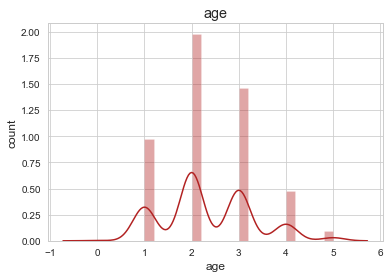

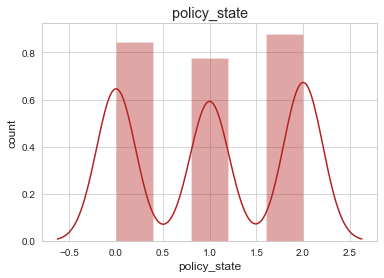

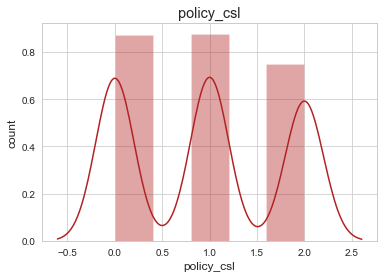

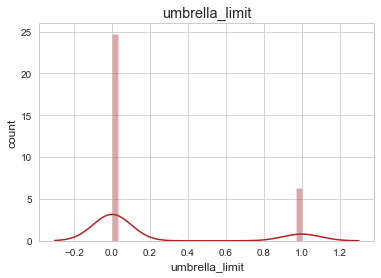

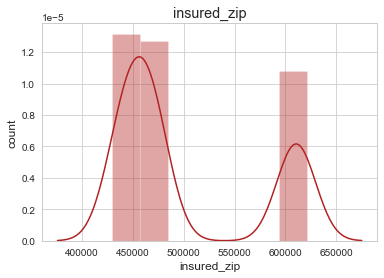

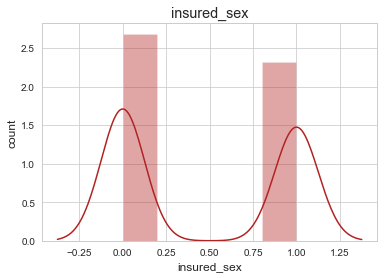

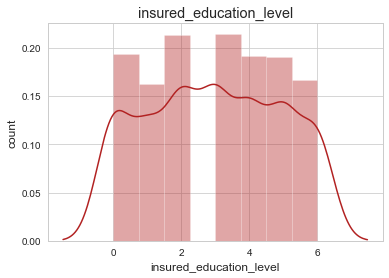

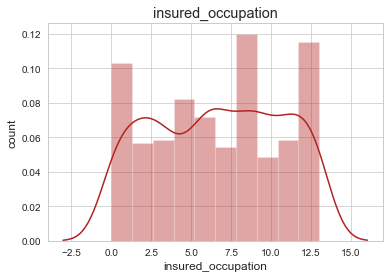

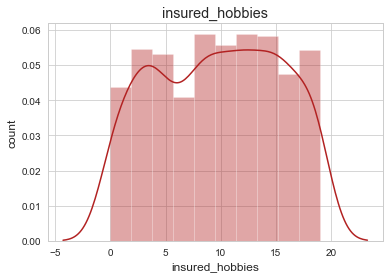

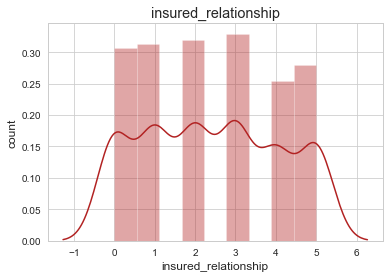

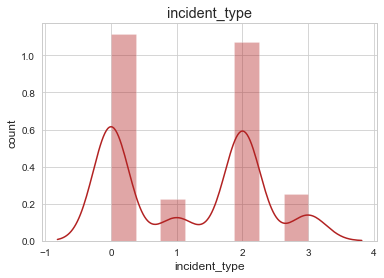

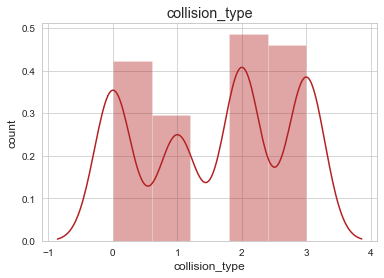

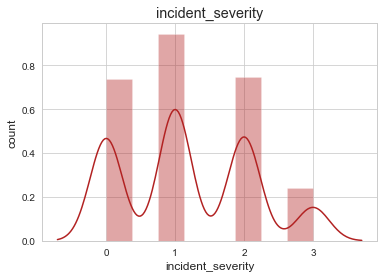

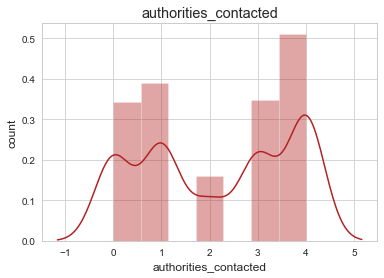

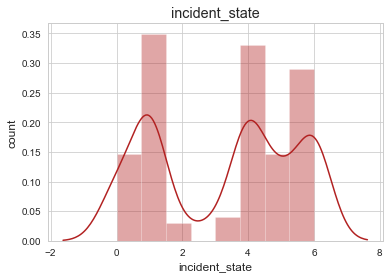

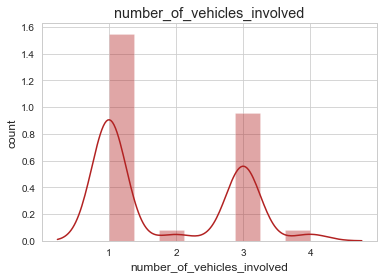

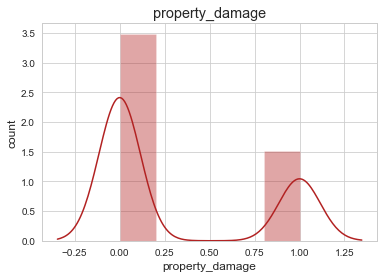

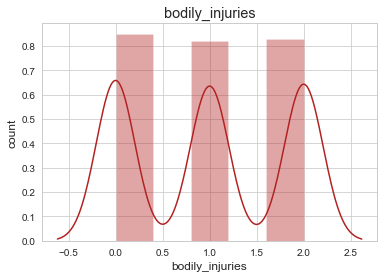

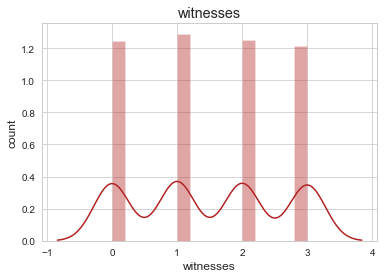

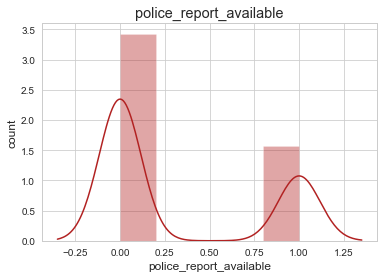

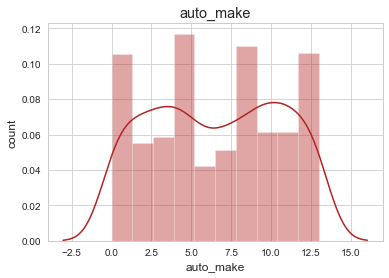

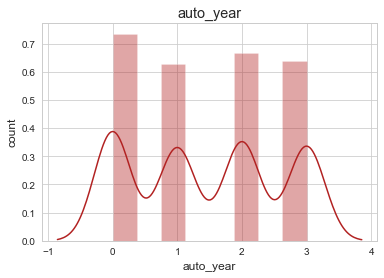

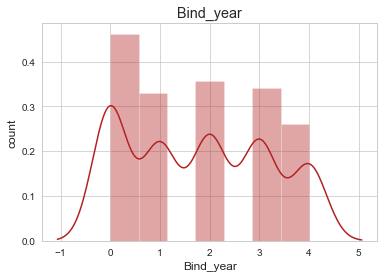

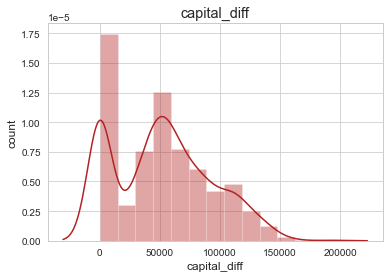

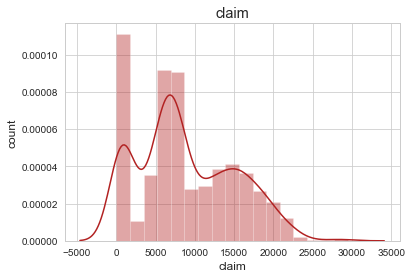

In [1035]:
for feature in x :
    sns.distplot(x[feature] , kde = True ,color ='firebrick' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here we can observe that there is skewness in our dataset . 

So we will use **PowerTransformer** for transforming/removing skewness from our dataset .

In [1039]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x)

In [1040]:
x_t

array([[  1.82395628,   1.5498196 ,   0.81005993, ...,   2.43066586,
         71.51246834, 190.21427746],
       [  1.82395628,   0.85768285,   0.81005993, ...,   1.97151928,
          0.        ,  64.49693183],
       [  0.79279231,   1.5498196 ,   0.        , ...,   0.82280403,
         63.23092684, 225.33365954],
       ...,
       [  1.36288005,   1.5498196 ,   0.81005993, ...,   1.44789595,
         63.23092684, 207.26421492],
       [  2.56545431,   0.        ,   1.41149068, ...,   2.43066586,
          0.        , 171.44185354],
       [  2.21789396,   1.5498196 ,   0.81005993, ...,   0.82280403,
          0.        ,  46.76896295]])

In [1041]:
x_trans = pd.DataFrame(x_t , columns = x.columns)
x_trans

,age,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_year,Bind_year,capital_diff,claim
0,1.823956,1.549820,0.810060,-0.000000,0.221995,0.559344,3.096134,1.729686,11.023445,0.000000,...,0.420212,0.243889,0.841269,1.596089,0.258863,6.527642,0.852574,2.430666,71.512468,190.214277
1,1.823956,0.857683,0.810060,0.144828,0.221995,0.559344,3.096134,4.523286,9.938517,1.599070,...,0.420212,-0.000000,0.000000,0.000000,-0.000000,5.450280,1.534681,1.971519,0.000000,64.496932
2,0.792792,1.549820,0.000000,0.144828,0.221995,-0.000000,4.354088,7.526168,1.742756,2.241433,...,0.559952,-0.000000,1.501437,2.236021,-0.000000,3.068648,1.534681,0.822804,63.230927,225.333660
3,1.823956,0.000000,0.810060,0.144828,0.221995,-0.000000,4.354088,0.916645,1.742756,2.828643,...,0.420212,-0.000000,0.841269,1.596089,-0.000000,2.400847,2.125322,0.000000,88.687217,188.587015
4,1.823956,0.000000,1.411491,0.144828,0.221995,0.559344,0.000000,7.526168,1.742756,2.828643,...,0.420212,-0.000000,0.000000,0.873151,-0.000000,0.000000,1.534681,2.430666,88.849183,87.166077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.362880,1.549820,1.411491,-0.000000,0.221995,-0.000000,3.738789,1.729686,8.823819,2.828643,...,0.420212,0.243889,0.000000,0.873151,-0.000000,4.305920,1.534681,0.000000,0.000000,340.220798
996,1.823956,0.000000,0.000000,-0.000000,0.221995,-0.000000,4.354088,6.367881,11.023445,3.375338,...,0.420212,0.243889,1.501437,2.236021,-0.000000,8.049949,2.125322,2.430666,77.751898,339.373777
997,1.362880,1.549820,0.810060,0.144828,0.221995,-0.000000,3.738789,0.916645,2.506430,1.599070,...,0.559952,-0.000000,1.501437,2.236021,0.258863,7.046213,0.000000,1.447896,63.230927,207.264215
998,2.565454,0.000000,1.411491,0.144828,0.221995,0.559344,0.000000,3.870427,0.000000,3.375338,...,0.420212,-0.000000,0.000000,0.873151,0.258863,0.902613,0.000000,2.430666,0.000000,171.441854


In [1042]:
x_trans.skew()

age                           -0.018857
policy_state                  -0.145377
policy_csl                    -0.100769
umbrella_limit                 1.486693
insured_zip                    0.000000
insured_sex                    0.148630
insured_education_level       -0.188564
insured_occupation            -0.239336
insured_hobbies               -0.247798
insured_relationship          -0.160421
incident_type                 -0.088766
collision_type                -0.232608
incident_severity             -0.079282
authorities_contacted         -0.227269
incident_state                -0.255777
number_of_vehicles_involved    0.363693
property_damage                0.863806
bodily_injuries               -0.128799
witnesses                     -0.153648
police_report_available        0.802728
auto_make                     -0.227539
auto_year                     -0.148632
Bind_year                     -0.133173
capital_diff                  -0.910957
claim                         -0.363381


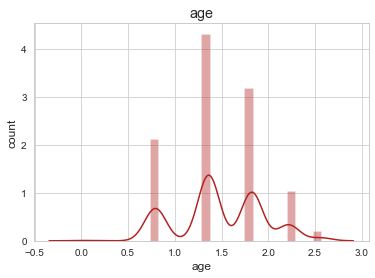

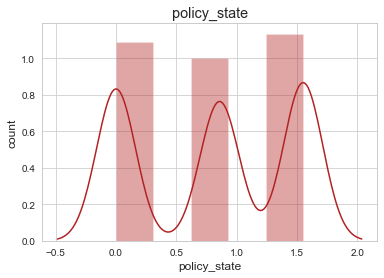

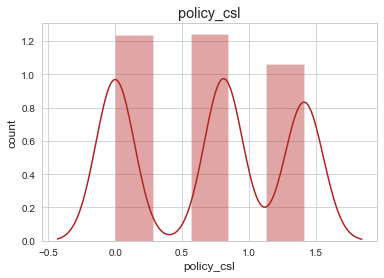

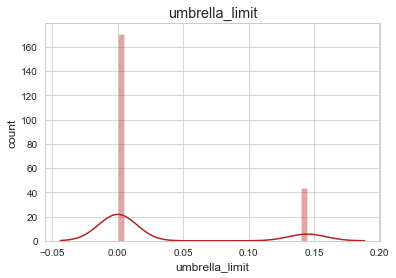

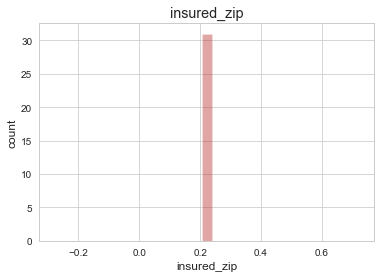

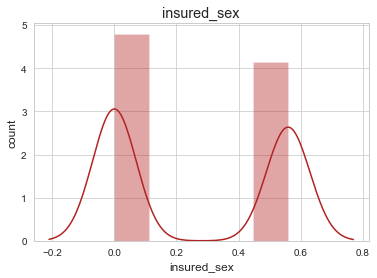

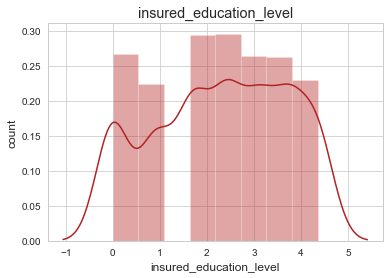

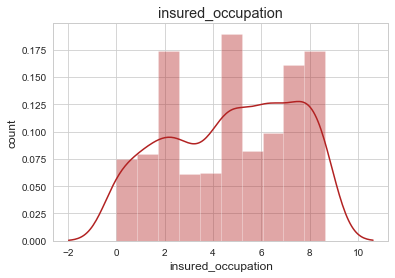

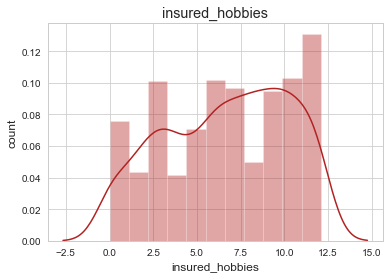

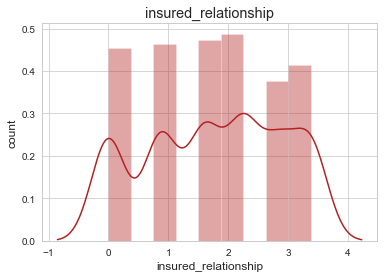

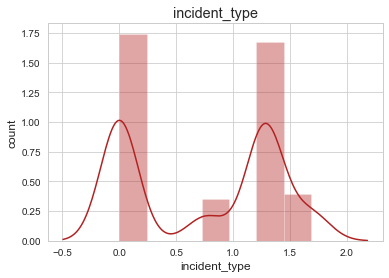

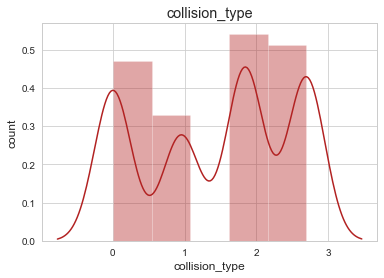

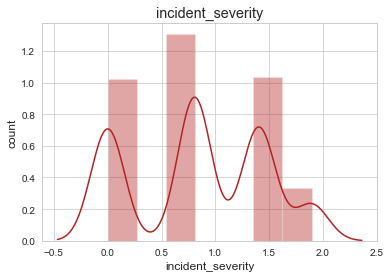

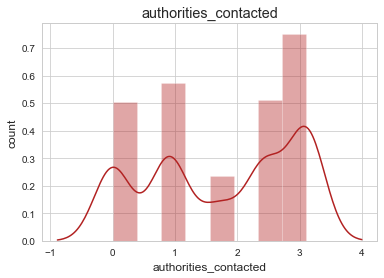

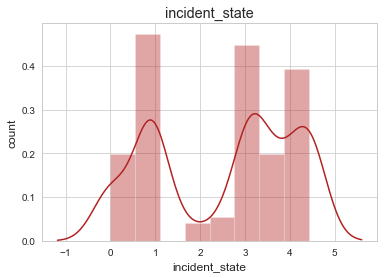

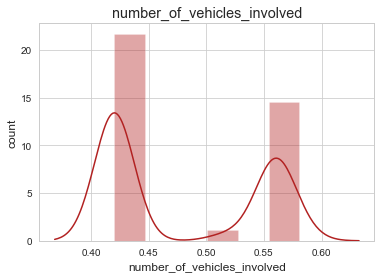

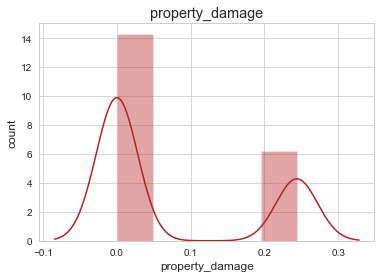

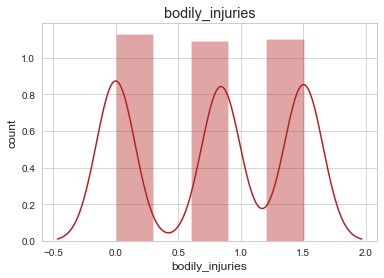

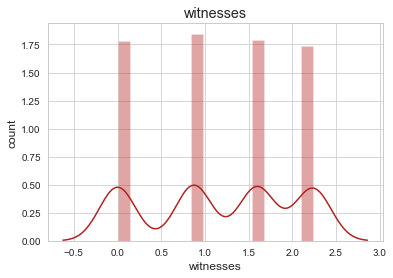

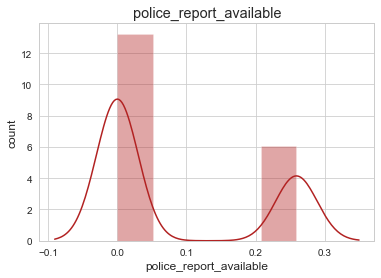

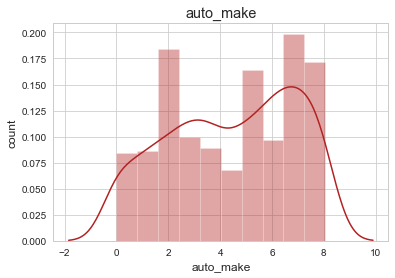

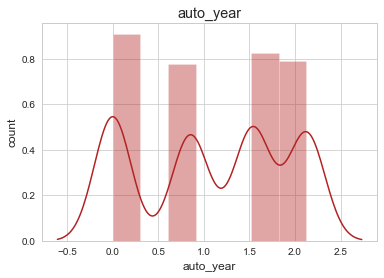

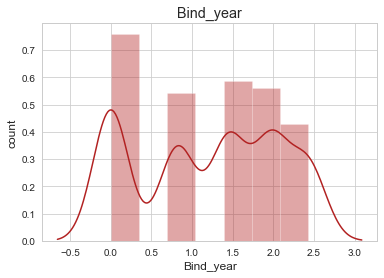

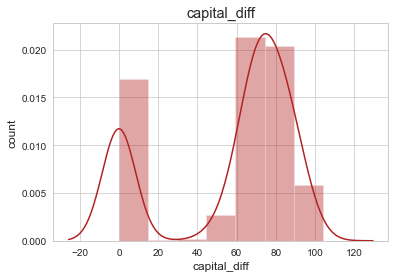

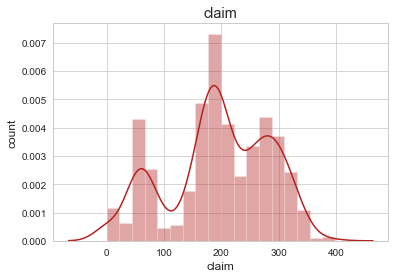

In [1044]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True , color = 'firebrick')
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

From above we can observe that we have sucessfully removed skewness and outliers from our dataset.

### Standard Scaling

Gaussian's distribution with zero mean and unit variance is standard scaling.

In [1047]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[ 0.73355953,  1.14604754,  0.17884614, ...,  1.41439657,
         0.44049027, -0.05382429],
       [ 0.73355953,  0.0718058 ,  0.17884614, ...,  0.88812483,
        -1.66314312, -1.4812515 ],
       [-1.51671254,  1.14604754, -1.23759599, ..., -0.42852739,
         0.19687783,  0.34493024],
       ...,
       [-0.27263055,  1.14604754,  0.17884614, ...,  0.28795015,
         0.19687783,  0.1397651 ],
       [ 2.35170405, -1.25937435,  1.23048668, ...,  1.41439657,
        -1.66314312, -0.26697124],
       [ 1.59323559,  1.14604754,  0.17884614, ..., -0.42852739,
        -1.66314312, -1.68253943]])

In [1048]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,age,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_year,Bind_year,capital_diff,claim
0,0.733560,1.146048,0.178846,-0.503123,0.0,1.076953,0.568665,-1.154771,1.227979,-1.564840,...,-0.843679,1.520282,0.108332,0.517616,1.478078,0.859111,-0.297682,1.414397,0.440490,-0.053824
1,0.733560,0.071806,0.178846,1.987585,0.0,1.076953,0.568665,-0.089755,0.920483,-0.148985,...,-0.843679,-0.657773,-1.254857,-1.410682,-0.676554,0.418616,0.550473,0.888125,-1.663143,-1.481251
2,-1.516713,1.146048,-1.237596,1.987585,0.0,-0.928546,1.462749,1.055047,-1.402398,0.419779,...,1.189521,-0.657773,1.178068,1.290743,-0.676554,-0.555149,0.550473,-0.428527,0.196878,0.344930
3,0.733560,-1.259374,0.178846,1.987585,0.0,-0.928546,1.462749,-1.464730,-1.402398,0.939708,...,-0.843679,-0.657773,0.108332,0.517616,-0.676554,-0.828189,1.284897,-1.371622,0.945708,-0.072301
4,0.733560,-1.259374,1.230487,1.987585,0.0,1.076953,-1.631894,1.055047,-1.402398,0.939708,...,-0.843679,-0.657773,-1.254857,-0.355794,-0.676554,-1.809810,0.550473,1.414397,0.950473,-1.223860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.272631,1.146048,1.230487,-0.503123,0.0,-0.928546,1.025429,-1.154771,0.604550,0.939708,...,-0.843679,1.520282,-1.254857,-0.355794,-0.676554,-0.049272,0.550473,-1.371622,-1.663143,1.649388
996,0.733560,-1.259374,-1.237596,-0.503123,0.0,-0.928546,1.462749,0.613468,1.227979,1.423766,...,-0.843679,1.520282,1.178068,1.290743,-0.676554,1.481528,1.284897,1.414397,0.624031,1.639771
997,-0.272631,1.146048,0.178846,1.987585,0.0,-0.928546,1.025429,-1.464730,-1.185954,-0.148985,...,1.189521,-0.657773,1.178068,1.290743,1.478078,1.071136,-1.357802,0.287950,0.196878,0.139765
998,2.351704,-1.259374,1.230487,1.987585,0.0,1.076953,-1.631894,-0.338647,-1.896338,1.423766,...,-0.843679,-0.657773,-1.254857,-0.355794,1.478078,-1.440763,-1.357802,1.414397,-1.663143,-0.266971


### Correlation Heatmap

<AxesSubplot:>

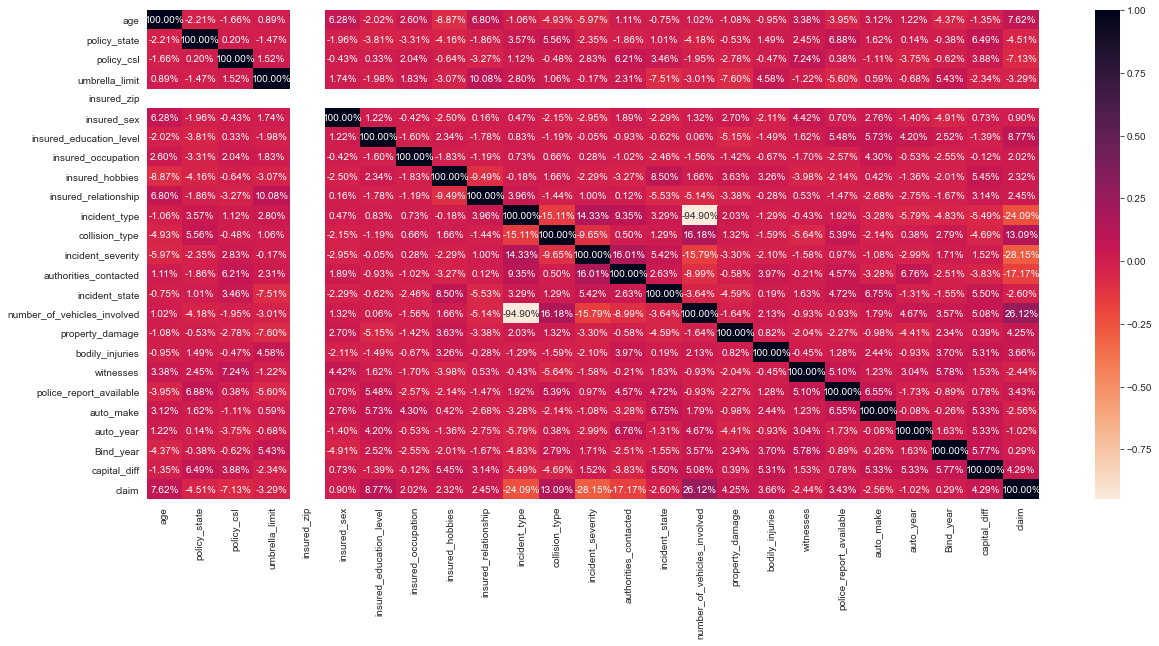

In [1050]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = "rocket_r" , annot = True , fmt = '.2%')

**Importance Bar Graph**

This graph shows the importance of each feature in predicting target variable .

In [1089]:
importances = pd.DataFrame({'feature':x_sc.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
0,0.067
22,0.062
21,0.061
11,0.058
1,0.053
2,0.046
16,0.042
3,0.042
8,0.042


In [ ]:
importances.plot.bar(color ='firebrick',saturation = 0.4)

Here we'll apply PCA to our dataframe as there are many features in correlatio with each other .

### Principal Component Analysis (PCA)

In [1053]:
pca = PCA(n_components = 'mle' , svd_solver = 'full' )
xpca = pca.fit_transform(x_sc)

In [1054]:
xpca

array([[-0.41176198, -1.62195872, -1.81595139, ...,  0.64787228,
         0.56487318,  0.07109991],
       [-2.2440814 ,  0.48957787,  0.76686086, ...,  0.09989289,
         0.28995548, -0.42066082],
       [ 1.34065529,  0.5547578 ,  2.06397256, ...,  1.25064963,
         0.09518629, -0.06474077],
       ...,
       [ 1.41560962, -0.35236041,  1.82038318, ...,  0.98213353,
         0.11309089, -0.04110048],
       [-1.06028277,  3.71337596,  1.59649775, ...,  0.05081699,
         0.75168728,  0.03111318],
       [-1.54318199, -0.77729912,  0.83854394, ...,  0.53620477,
         0.10565256,  0.50655998]])

In [1055]:
x_f = pd.DataFrame(xpca )
x_f

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.411762,-1.621959,-1.815951,-1.422926,-0.371005,1.221003,0.810464,-0.999494,0.014308,2.171763,...,1.514894,-0.985331,0.154108,0.278956,-1.186961,-0.538029,0.235084,0.647872,0.564873,0.071100
1,-2.244081,0.489578,0.766861,0.520142,0.732432,-0.292489,-1.517599,0.350768,-0.006536,0.411355,...,1.835923,-1.095202,0.326075,0.160727,-0.876535,0.588016,1.659840,0.099893,0.289955,-0.420661
2,1.340655,0.554758,2.063973,0.068852,-1.605809,0.950580,-1.443663,0.006401,0.325992,0.245954,...,-1.414156,0.804953,-0.035113,1.688634,1.285600,1.438633,-1.068729,1.250650,0.095186,-0.064741
3,-1.164119,1.957827,1.452254,-0.978382,-0.403357,-0.621052,-1.430473,-1.047242,0.941953,-0.150864,...,-0.850207,-1.051869,-1.143662,-0.703285,0.006310,1.335570,-1.145315,1.268526,0.943874,0.013858
4,-1.939172,2.510698,2.289995,0.573473,-0.815924,-0.742831,0.687745,-0.293019,-1.036974,-0.701861,...,1.492889,0.544559,0.847705,-1.869679,-0.963996,0.069308,0.174999,-0.212517,0.729130,-0.460892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.718707,1.407521,-1.690546,0.367751,0.520543,0.470212,-0.134663,-1.477730,-0.221517,-0.827308,...,-1.527367,-1.904017,-1.932487,0.865607,0.006150,0.598634,1.061219,-0.547444,-1.958578,0.016078
996,0.495738,0.757545,-2.077991,-1.670032,-1.570858,-1.852322,-1.444323,-1.113433,0.726732,0.840216,...,1.546221,0.219016,-1.479954,0.982815,1.004906,-0.664911,0.067534,-0.066223,-0.015671,-0.001891
997,1.415610,-0.352360,1.820383,-1.087983,-1.851788,2.323797,-0.649890,0.356463,-0.853309,1.530844,...,-1.252933,-0.899255,-0.713349,0.712445,-0.691313,-0.039118,-1.536779,0.982134,0.113091,-0.041100
998,-1.060283,3.713376,1.596498,-0.201627,0.175615,1.987512,0.542548,0.261200,-1.857435,0.777420,...,1.599271,-0.108975,0.428215,-1.973580,-2.035053,-0.219278,0.953954,0.050817,0.751687,0.031113


In [1056]:
print(pca.components_)

[[ 2.90909850e-02 -3.17513012e-02 -5.18568856e-02 -3.79314763e-02
   2.77555756e-17  6.44761643e-03  2.44889670e-02 -3.25188241e-03
   3.02702021e-02 -4.19998037e-02 -5.95901252e-01  1.99803048e-01
  -2.62816795e-01 -1.71077087e-01 -4.67264263e-02  6.01909018e-01
   9.89040848e-03  2.53872563e-02 -1.42730007e-02 -5.31881722e-03
   2.26761946e-02  5.03048701e-02  4.69029674e-02  5.77444823e-02
   3.51133372e-01]
 [ 3.47948075e-01 -1.35604970e-01 -1.86590921e-01  2.66130986e-01
  -5.55111512e-17  1.51245018e-01 -7.34408489e-02  1.10245454e-01
  -2.98855991e-01  3.78991041e-01  1.16095738e-01 -6.14984253e-02
  -2.52794951e-01 -1.65617040e-01 -3.98849459e-01 -1.11917847e-01
   3.69832768e-02 -7.28703203e-02 -6.03086639e-02 -2.39899257e-01
  -1.58700130e-01 -8.26627959e-02 -9.92179970e-02 -2.22209276e-01
   2.05479997e-01]
 [ 8.59004136e-02 -6.75641796e-02  2.11967749e-01  2.92275408e-01
   3.81639165e-17  2.61977434e-02 -9.03279445e-02  1.41294318e-02
  -3.31008712e-01  1.79990397e-01 -2.6

In [1057]:
x_f.shape

(1000, 24)

## Implementing Machine Learning Models

### Finding Best Random State

In [1060]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    predlr = lr.predict(X_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.83 on random state  18


In [1063]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=18)

models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB(),
             ExtraTreeClassifier(),
             GradientBoostingClassifier(),
             BaggingClassifier()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' , 'ExtraTreeClassifier','GradientBoostingClassifier',
         'BaggingClassifier' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

LogisticRegression  -  0.79
Accuracy: 0.83
Confusion Matrix:
 [[219  38]
 [ 13  30]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       257
           1       0.44      0.70      0.54        43

    accuracy                           0.83       300
   macro avg       0.69      0.77      0.72       300
weighted avg       0.87      0.83      0.84       300

K Nearest Neighbor  -  0.8157142857142857
Accuracy: 0.7266666666666667
Confusion Matrix:
 [[208  58]
 [ 24  10]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       266
           1       0.15      0.29      0.20        34

    accuracy                           0.73       300
   macro avg       0.52      0.54      0.52       300
weighted avg       0.81      0.73      0.76      

### Accuracy Plot

Plotting Accuracies of different Algorithms to find the perfect one for our model.

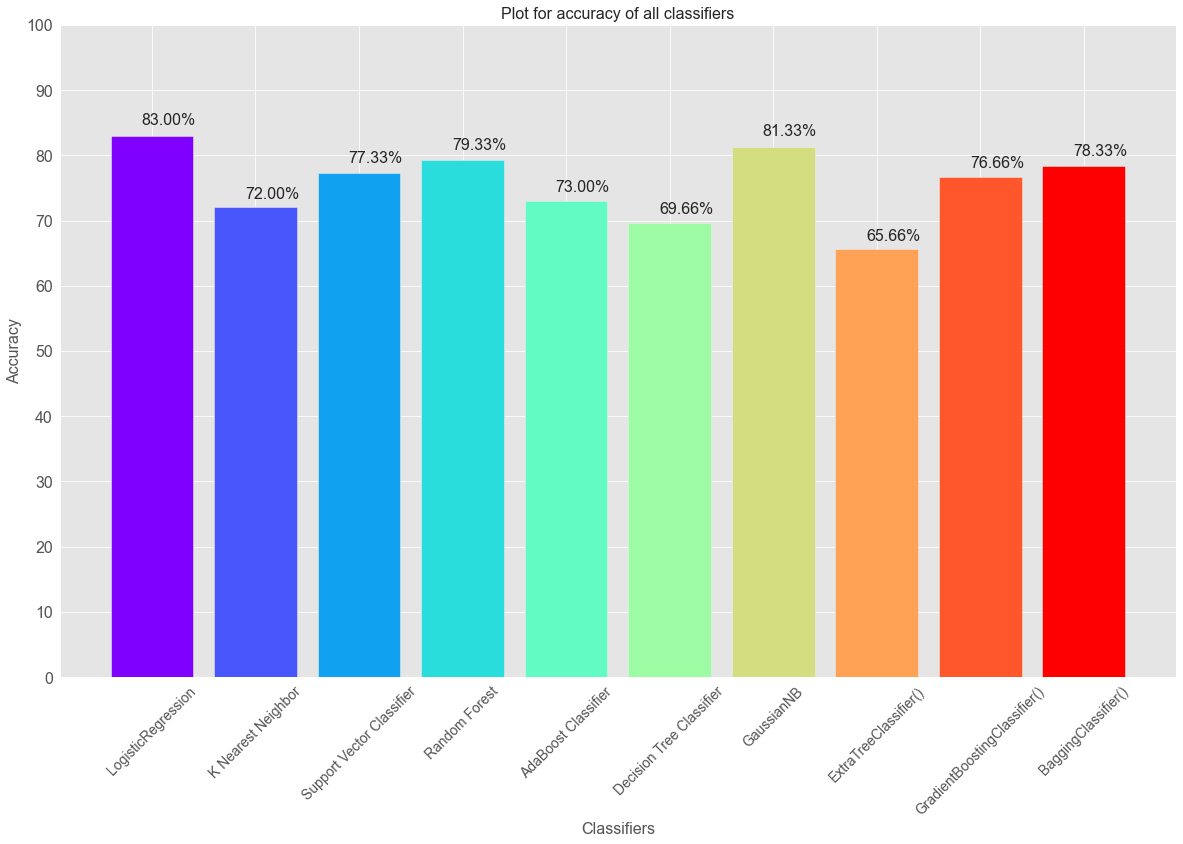

In [1066]:

accuracies  = [83 , 72 , 77.33 , 79.33 , 73 , 69.66 , 81.33 , 65.66 , 76.66 , 78.33]

plt.figure(figsize = (20,12))
colors = rainbow(np.linspace(0, 1, len(models)))
barplot = plt.bar(x = names , height = accuracies , color = colors ,tick_label = names)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(rotation = 45 ,  fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

From above we can observe that Logistic Regression , Random Forest & Gaussian NB has the best accuracy scores , So we'll work on these algorithms only and will find the best one .

### Training Logistic Regression again

In [1064]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=18)

lr  = LogisticRegression()
lr.fit(X_train , y_train)
pred_lr = lr.predict(X_test)
print("Accuracy:",accuracy_score(pred_lr, y_test))
print("Confusion Matrix:\n",confusion_matrix(pred_lr , y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(pred_lr , y_test))

Accuracy: 0.83
Confusion Matrix:
 [[219  38]
 [ 13  30]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       257
           1       0.44      0.70      0.54        43

    accuracy                           0.83       300
   macro avg       0.69      0.77      0.72       300
weighted avg       0.87      0.83      0.84       300



#### Logistic Regression Hyperparameter Tuning

In [1067]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train , y_train)

ab_grid_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy:",accuracy_score(ab_grid_pred , y_test))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Accuracy: 0.83
Best: 0.757181 using {'solver': 'liblinear'}
0.755756 (0.022469) with: {'solver': 'newton-cg'}
0.755756 (0.022469) with: {'solver': 'lbfgs'}
0.757181 (0.020628) with: {'solver': 'liblinear'}


### Training Random Forest again

In [1069]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=18)

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_predicted = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train , y_train) * 100, 2)
print("Accuracy:",accuracy_score(y_predicted , y_test))
print(round(acc_random_forest,2,), "%")

Accuracy: 0.7733333333333333
100.0 %


#### Random Forest Hyperparameter tuning

In [1071]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}

hrf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
hrf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
hrf_result = hrf.fit(X_train, y_train)
hrf_pred = hrf.best_estimator_.predict(X_test)
print("Accuracy:",accuracy_score(hrf_pred , y_test))
print("Best: %f using %s" % (hrf_result.best_score_, hrf_result.best_params_))

Accuracy: 0.78
Best: 0.751429 using {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}


### Training Gaussian NB again 

In [1075]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=18)

gb = GaussianNB()
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
gb.score(X_train, y_train)
acc_random_forest = round(gb.score(X_train , y_train) * 100, 2)
print("Accuracy:",accuracy_score(pred_gb, y_test))
print("Confusion Matrix:\n",confusion_matrix(pred_gb , y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(pred_gb , y_test))

Accuracy: 0.8133333333333334
Confusion Matrix:
 [[211  35]
 [ 21  33]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       246
           1       0.49      0.61      0.54        54

    accuracy                           0.81       300
   macro avg       0.70      0.73      0.71       300
weighted avg       0.83      0.81      0.82       300



From all of the above 3 we algorithms we find that Logistic Regression is working with our dataset the best.

#### PLotting y_test and y_predicted for our datset . 

>1, train: 0.790, test: 0.830
>2, train: 0.790, test: 0.830
>3, train: 0.790, test: 0.830
>4, train: 0.790, test: 0.830
>5, train: 0.790, test: 0.830
>6, train: 0.790, test: 0.830
>7, train: 0.790, test: 0.830
>8, train: 0.790, test: 0.830
>9, train: 0.790, test: 0.830
>10, train: 0.790, test: 0.830
>11, train: 0.790, test: 0.830
>12, train: 0.790, test: 0.830
>13, train: 0.790, test: 0.830
>14, train: 0.790, test: 0.830
>15, train: 0.790, test: 0.830
>16, train: 0.790, test: 0.830
>17, train: 0.790, test: 0.830
>18, train: 0.790, test: 0.830
>19, train: 0.790, test: 0.830
>20, train: 0.790, test: 0.830
>21, train: 0.790, test: 0.830
>22, train: 0.790, test: 0.830
>23, train: 0.790, test: 0.830
>24, train: 0.790, test: 0.830
>25, train: 0.790, test: 0.830
>26, train: 0.790, test: 0.830
>27, train: 0.790, test: 0.830
>28, train: 0.790, test: 0.830
>29, train: 0.790, test: 0.830
>30, train: 0.790, test: 0.830


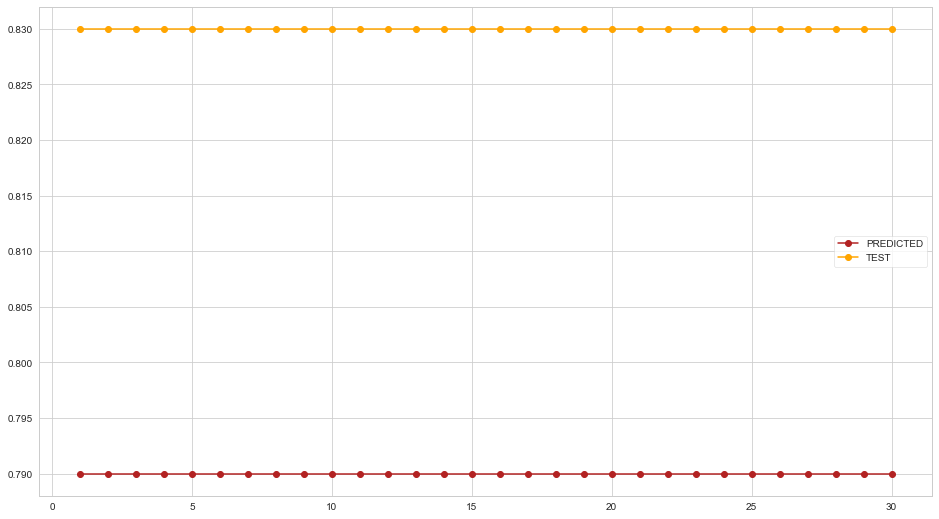

In [1092]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=18)

train_scores, test_scores = list(), list()
values = [i for i in range(1,31)]

for i in values:

    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    grid = dict(solver=solvers)

    model = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy')
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    
    
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.figure(figsize=(16,9))
plt.plot(values, train_scores, '-o', label='PREDICTED' ,color ='firebrick')
plt.plot(values, test_scores, '-o', label='TEST' , color = 'orange')
plt.legend()
plt.show()

**Getting the probabilities**

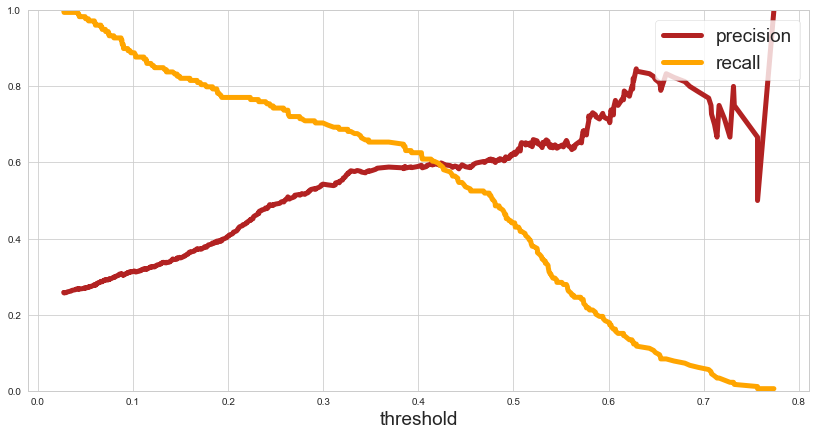

In [1095]:
y_scores = grid_search.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5 , color = 'firebrick')
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5 , color = 'orange')
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [1096]:
import joblib
joblib.dump(lr , 'LogisticRegressio.pkl')

['LogisticRegressio.pkl']